## 1. 선형회귀 & 오차역전파 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 1) 넘파이로 짜는 선형회귀 & 오차역전파

In [ ]:
import numpy as np

# 공부시간(h)을 x로 넣고 시험점수(y)를 예측
X = np.array([1, 2, 3, 4, 5])
y = np.array([60, 70, 80, 90, 100])

# 평균 계산을 위한 데이터 갯수를 미리 구함
m = len(X) # 학생수

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01 # 경사하강법에서 접선의 기울기에 곱하는 값
epochs = 100 # 학습 횟수

for epoch in range(epochs):
    # 선형 모델
    # [0,0,0,0,0] =  0*[1,2,3,4,5] + 0
    y_pred = w * X + b # y= wx +b

    # Mean Squared Error

                       #[60, 70, 80, 90, 100] - [0,0,0,0] = [3600, 4900, 6400, 8100, 10000]
    cost = (1/m) * sum((y - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X * (y - y_pred))  # 가중치에 대한 편미분
    db = -(2/m) * sum(y - y_pred)        # 절편에 대한 편미분

    # 경사하강법 수행
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습이 끝난 후 최종 가중치와 절편 출력
print(f'\n최종 가중치와 절편 값은: w = {w:.4f}, b = {b:.4f}')

# 모델 예측
y_pred = w * X + b
print(f'예측 값: {y_pred}')


Epoch 1: Cost = 6600.0000, w = 5.2000, b = 1.6000
Epoch 11: Cost = 355.5166, w = 20.5692, b = 7.4245
Epoch 21: Cost = 305.9810, w = 21.2394, b = 9.1253
Epoch 31: Cost = 285.8235, w = 20.9338, b = 10.5055
Epoch 41: Cost = 267.1042, w = 20.5743, b = 11.8219
Epoch 51: Cost = 249.6113, w = 20.2225, b = 13.0933
Epoch 61: Cost = 233.2640, w = 19.8821, b = 14.3223
Epoch 71: Cost = 217.9874, w = 19.5531, b = 15.5104
Epoch 81: Cost = 203.7112, w = 19.2350, b = 16.6589
Epoch 91: Cost = 190.3700, w = 18.9274, b = 17.7691

최종 가중치와 절편 값은: w = 18.6594, b = 18.7367
예측 값: [ 37.39614963  56.05557597  74.71500231  93.37442865 112.03385499]


### 문제: 아래 칸을 채워넣어 학습 코드를 완성하시오.

In [ ]:
import numpy as np

# 공부시간(h)을 x로 넣고 시험점수(y)를 예측
X = np.array([1, 2, 3, 4, 5])
y = np.array([60, 70, 80, 90, 100])

# 평균 계산을 위한 데이터 갯수를 미리 구함
m = len(X)

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    # 선형 모델
    y_pred = w * X + b

    # Mean Squared Error
    cost = (1/m) * sum((y - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X * (y - y_pred))
    db = -(2/m) * sum(y - y_pred)

    # 경사하강법 수행
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습이 끝난 후 최종 가중치와 절편 출력
print(f'\n최종 가중치와 절편 값은: w = {w:.4f}, b = {b:.4f}')

# 모델 예측
y_pred = w * X + b
print(f'와인퀄리티 예측: {y_pred}')

### 2) 캘리포니아 주택 가격 데이터셋을 이용한 선형회귀

### 사이킷런에서 제공해주는 캘리포니아 주택 가격 데이터셋 컬럼 리스트

#### 1. X값 (feature)

- MedInc (Median Income): 중간 소득 (단위: 10,000 달러)

- HouseAge (Housing Median Age): 주택 중간 연령

- AveRooms (Average Rooms per Household): 가구당 평균 방 개수.

- AveBedrms (Average Bedrooms per Household): 가구당 평균 침실 개수.

- Population: 해당 지역의 인구 수

- AveOccup (Average Occupancy per Household): 가구당 평균 거주자 수.

- Latitude: 해당 지역의 위도

- Longitude: 해당 지역의 경도

#### 2. y값 (target)

- MedHouseVal (Median House Value): 주택 중간 가격 (단위: 10,000 달러)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing  # 캘리포니아 주택 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 캘리포니아 주택 가격 데이터
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X = california.data[:, 0]  # 중간소득만 X값으로 사용
y = california.target  # 주택 가격 y값

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()

                # scaler에 2차원으로 줘서 변환 후 1차원으로 원상 복귀
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
                # scaler에 2차원으로 줘서 변환 후 1차원으로 원상 복귀
X_valid = scaler.transform(X_valid.reshape(-1, 1)).flatten()

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

# 평균을 위한 갯수 측정
m = len(X_train)

# 경사 하강법을 통한 학습
for epoch in range(epochs):
    # 선형 모델
            # 예측값 = 0 * 중간소득 + 0
    y_pred = w * X_train + b

    # Mean Squared Error
                      # (주택가격 정답 - 예측값 ) ^2를 모든데이터에 대해서 구한다음에 합하고 m으로 나눔
    cost = (1/m) * sum((y_train - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X_train * (y_train - y_pred))  # w에 대한 편미분
    db = -(2/m) * sum(y_train - y_pred)             # b에 대한 편미분

    # 파라미터 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 비용 출력
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습된 모델을 테스트 데이터에 적용하여 예측
y_pred_valid = w * X_valid + b

# 테스트 결과 출력
print("\n평가 데이터 셋 예측:")
print(y_pred_valid)

# 실제값과 비교
print("\n정답 값:")
print(y_valid)

# MSE 계산
mse_valid = (1/len(y_valid)) * sum((y_valid - y_pred_valid)**2)
print(f"\n평가 데이터 셋 Mean Squared Error: {mse_valid:.4f}")

# R2 Score 계산
r2 = r2_score(y_valid, y_pred_valid)
print(f"평가 데이터 셋 R2 Score: {r2:.4f}")

# RMSE 계산
rmse_valid = np.sqrt(mse_valid)
print(f"평가 데이터 셋 Root Mean Squared Error: {rmse_valid:.4f}")

# MAE 계산
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
print(f"평가 데이터 셋 Mean Absolute Error: {mae_valid:.4f}")


Epoch 1: Cost = 5.6297, w = 0.0160, b = 0.0414
Epoch 11: Cost = 3.9909, w = 0.1591, b = 0.4129
Epoch 21: Cost = 2.8967, w = 0.2761, b = 0.7164
Epoch 31: Cost = 2.1663, w = 0.3717, b = 0.9643
Epoch 41: Cost = 1.6786, w = 0.4497, b = 1.1669
Epoch 51: Cost = 1.3530, w = 0.5135, b = 1.3325
Epoch 61: Cost = 1.1357, w = 0.5657, b = 1.4678
Epoch 71: Cost = 0.9906, w = 0.6083, b = 1.5783
Epoch 81: Cost = 0.8937, w = 0.6431, b = 1.6686
Epoch 91: Cost = 0.8290, w = 0.6715, b = 1.7424

평가 데이터 셋 예측:
[0.99713116 1.30633464 1.65143788 ... 3.74275332 1.39861193 1.67762615]

정답 값:
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]

평가 데이터 셋 Mean Squared Error: 0.7935
평가 데이터 셋 R2 Score: 0.3944
평가 데이터 셋 Root Mean Squared Error: 0.8908
평가 데이터 셋 Mean Absolute Error: 0.6244


### 문제: 와인 CSV파일이 주어졌을때 아래 칸을 채워넣어 학습 코드를 완성하시오.

#### 와인 데이터셋 feature 설명

- fixed acidity: 고정 산도
- volatile acidity: 휘발성 산도
- citric acid: 구연산
- residual sugar: 잔류 당분
- chlorides: 염화물
- free sulfur dioxide: 유리 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소 이온 농도 (산성도)
- sulphates: 황산염
- alcohol: 알코올 도수
- quality: 품질 (와인의 품질 등급)
- class: 클래스 (와인의 종류 또는 품종)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 와인 데이터 로드
data = pd.read_csv('wine.csv')

X = data['residual sugar'].values  # 잔류 당분을 X로
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# 데이터를 훈련 세트와 valid 세트로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2,random_state=42 )


# 데이터 정규화
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1,1)).flatten()

X_valid = scaler.transform(X_valid.reshape(-1,1)).flatten()

# 파라미터 초기화

w = 0
b= 0

# 학습률, 반복 횟수
learning_rate = 0.01
epoch = 100

# 평균을 위한 갯수 측정
m=len(X_train)

# 경사 하강법을 통한 학습
for epoch in range(epoch):
    # 선형 모델
    y_pred = w*X_train + b
    # Mean Squared Error


    cost = (1/m)*sum((y_train-y_pred)**2) # 정답값 - 예측값

    # 기울기 계산
    dw = -(2/m) * sum(X_train * (y_train - y_pred))  # w에 대한 편미분
    db = -(2/m) * sum(y_train - y_pred)             # b에 대한 편미분

    # 파라미터 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 비용 출력

    if epoch %10 ==0:
        print(f'Epoch {epoch+1}, Cost :{cost:.4f},w:{w:.4f} , b{b:.4f}')

# 학습된 모델을 테스트 데이터에 적용하여 예측
y_pred_valid = w * X_valid +b

# 테스트 결과 출력
print(f'예측 결과 : {y_pred_valid}')


# 실제값과 비교
print("\n정답 값:")
print(y_valid)


# MSE 계산
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
print(f"평가 데이터 셋 Mean Absolute Error: {mae_valid:.4f}")



Epoch 1, Cost :111.3250,w:-0.0087 , b0.2097
Epoch 11, Cost :74.7301,w:-0.0868 , b2.0891
Epoch 21, Cost :50.2991,w:-0.1506 , b3.6246
Epoch 31, Cost :33.9887,w:-0.2027 , b4.8793
Epoch 41, Cost :23.0998,w:-0.2453 , b5.9045
Epoch 51, Cost :15.8303,w:-0.2801 , b6.7421
Epoch 61, Cost :10.9771,w:-0.3085 , b7.4266
Epoch 71, Cost :7.7370,w:-0.3317 , b7.9858
Epoch 81, Cost :5.5739,w:-0.3507 , b8.4427
Epoch 91, Cost :4.1299,w:-0.3662 , b8.8160
예측 결과 : [8.51607171 9.35095606 8.94139015 ... 9.38246113 8.760236   8.30341248]

정답 값:
[12.2  9.9 12.  ... 12.4  9.4  8.7]
평가 데이터 셋 Mean Absolute Error: 1.4509


### 1. 파이토치 모듈 이해

In [ ]:
import torch  # 딥러닝 프레임워크 파이토치 불러오기
import torch.autograd # 자동 미분(back prop)을 위함 함수들 포함
import torch.nn # 간단한 선형 방정식 정의, 다양한 레이어, 활성화 함수,
import torch.optim # 최적화 알고리즘들이 담겨있는 모듈

# ※ 텐서조작을 왜 공부해야 할 까?

→ 텐서의 구조가 익숙해야 이미지와 시계열에 대해서 잘 조작할 수 있다.

이미지는 (묶음사이즈, 크기, 세로)

시계열은 (묶음사이즈, 시간길이, 크기, 세로)



## 2. 텐서 조작 (참고:위키독스)

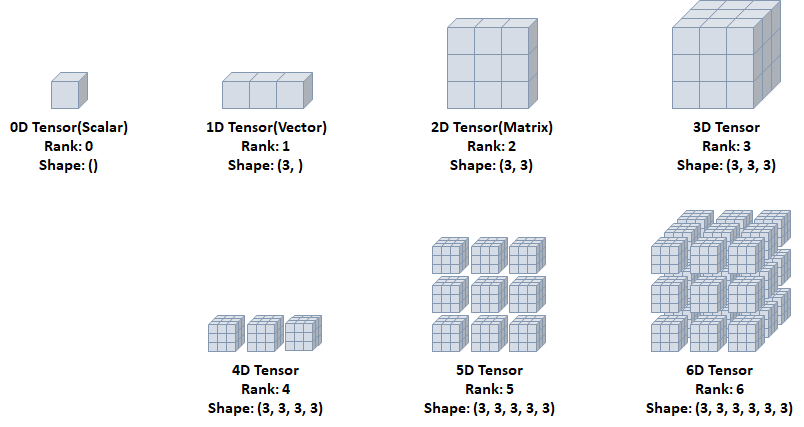

파이토치에서는 텐서 타입만 가능 -> 텐서 shape 알아야 함
* 3D: (z, x, y)

### 2. 텐서 조작 - 1) 넘파이로 텐서 만들기

In [ ]:
import numpy as np

# 1) 1D Numpy 행렬
# list -> tensor
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print('Shape of t: ', t.shape)

Shape of t:  (7,)


In [ ]:
# 2) 2D Numpy 행렬

t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print('Shape of t: ', t.shape)

Shape of t:  (4, 3)


### 2. 텐서 조작 - 2) 파이토치로 텐서 만들기

In [ ]:
import torch

# 1) 1D PyTorch 텐서
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # size

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])


In [ ]:
# 2) 2D PyTorch 텐서
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape) # shape
print(t.size()) # size

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
torch.Size([4, 3])


### 2. 텐서 조작 - 3) 브로드캐스팅(Broadcasting)

In [ ]:
# 텐서 + 텐서
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# 벡터 텐서 + scalar 텐서
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
m1 = torch.FloatTensor([[1, 2]]) # 2 x 1 벡터 텐서
m2 = torch.FloatTensor([[3], [4]]) # 1 x 2 벡터 텐서
print(m1 + m2) # 각각 더해져서 나온다.

tensor([[4., 5.],
        [5., 6.]])


■ 중간문제: 텐서 덧셈 훈련 (15분)


In [ ]:
# 1. [[1,2]] + [3] =  [[4,5]]


# 2. [[1,2],[4,5]] + [7] =    [[8, 9]],[[11,12]]

# 3. [[1,2],[4,5]] + [1,2] =   [2., 4.],
                            # [ [5., 7.]]

# 4. [[1,2,3],[4,5,6]] + [7] = [8,9,10]
                              #[11,12,13]

# 5. [[1,2],[3,4]] + [5] =  [6,7]
                           #[8,9]

# 6. [[6]] + [[2,4],[5,6]] = [8,10]
                            #[11,12]

# 7. [[3,4]] + [[1,2],[3,4]] =  [4,6]
                                #[6,8]

# 8. [[2,4]] + [5] = [6,9]

# 9. [[1,2],[3,4]] + [6] = [7,8]
                         # [9,10]

# 10. [[5,7],[9,11]] + [2,3] =  [7,10]
                               # [11,14]
# 11. [[1,1,1],[2,2,2]] + [3] =  [4,4,4]
                               # [5,5,5]

# 12. [[3,5],[7,9]] + [[1,2],[3,4]] = [4,7]
                                   #  [10,13]
# 13. [[4]] + [[1,3],[5,7]] = [4,7]
                           #   [9,11]
# 14. [[6,8]] + [4] = [10,12]

# 15. [[3,3],[3,3]] + [7] = [10,10]
                           # [10,10]

# 16. [[2,4,6]] + [[1,1,1],[2,2,2]] = [3,4,7]
                                    # [4,6,8]

# 17. [[9,8],[7,6]] + [1] = [[10,9],[8,7]]
# 18. [[1]] + [[5,5],[5,5]] = [[6,6] ,[6,6]]

# 19. [[4,4]] + [[2,2],[2,2]] = [[6,6],[6,6]]

# 20. [[1,2,3],[4,5,6],[8,9,9]] + [3] = [[4,5,6],[7,8,9],[11,12,12]]


# 답
# 1. [[1,2]] + [3] = [[4,5]]
# 2. [[1,2],[4,5]] + [7] = [[8,9],[11,12]]
# 3. [[1,2],[4,5]] + [1,2] = [[2,4],[5,7]]
# 4. [[1,2,3],[4,5,6]] + [7] = [[8,9,10],[11,12,13]]
# 5. [[1,2],[3,4]] + [5] = [[6,7],[8,9]]
# 6. [[6]] + [[2,4],[5,6]] = [[8,10],[11,12]]
# 7. [[3,4]] + [[1,2],[3,4]] = [[4,6],[6,8]]
# 8. [[2,4]] + [5] = [[7],[9]]
# 9. [[1,2],[3,4]] + [6] = [[7,8],[9,10]]
# 10. [[5,7],[9,11]] + [2,3] = [[7,10],[11,14]]
# 11. [[1,1,1],[2,2,2]] + [3] = [[4,4,4],[5,5,5]]
# 12. [[3,5],[7,9]] + [[1,2],[3,4]] = [[4,7],[10,13]]
# 13. [[4]] + [[1,3],[5,7]] = [[5,7],[9,11]]
# 14. [[6,8]] + [4] = [[10,12]]
# 15. [[3,3],[3,3]] + [7] = [[10,10],[10,10]]
# 16. [[2,4,6]] + [[1,1,1],[2,2,2]] = [[3,5,7],[4,6,8]]
# 17. [[9,8],[7,6]] + [1] = [[10,9],[8,7]]
# 18. [[1]] + [[5,5],[5,5]] = [[6,6],[6,6]]
# 19. [[4,4]] + [[2,2],[2,2]] = [[6,6],[6,6]]
# 20. [[1,2,3],[4,5,6],[8,9,9]] + [3] = [[4,5,6],[7,8,9],[10,11,12]]

tensor([[ 8.,  9.],
        [11., 12.]])


### 2. 텐서 조작 - 4) 곱셈

### 행렬곱 (Matrix Multiplication) - 행렬 곱셈으로 수행

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2 행렬 원소 곱셈 원리 (m x n) x (n x p)
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1 (열벡터) ※ 1x2 (행벡터)
print(m1.matmul(m2)) # 2 x 1  matrix multiplication

tensor([[ 5.],
        [11.]])


### 곱셈 (Multiplication) - 원소끼리 곱해짐

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2 동일한 연산.

tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### 2. 텐서 조작 - 5) 평균

In [ ]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())

tensor(2.5000)


In [ ]:
print(t.mean(dim=0)) # 세로방향
print(t.mean(dim=1)) # 가로방향

tensor([2., 3.])
tensor([1.5000, 3.5000])


### 2. 텐서 조작 - 6) 덧셈

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 세로방향

print(t.sum(dim=1)) # 가로방향, 마지막 차원
print(t.sum(dim=-1)) # 마지막 차원    (2,2) => 0, 1 dim 방향 즉 마지막 차원은 dim=1 이란 뜻이다.

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### 3차원은 좀 dim 인덱스 순서가 다르다!

2D: 0 세로, 1 가로

3D: 0 z 방향, 1 세로, 2 가로

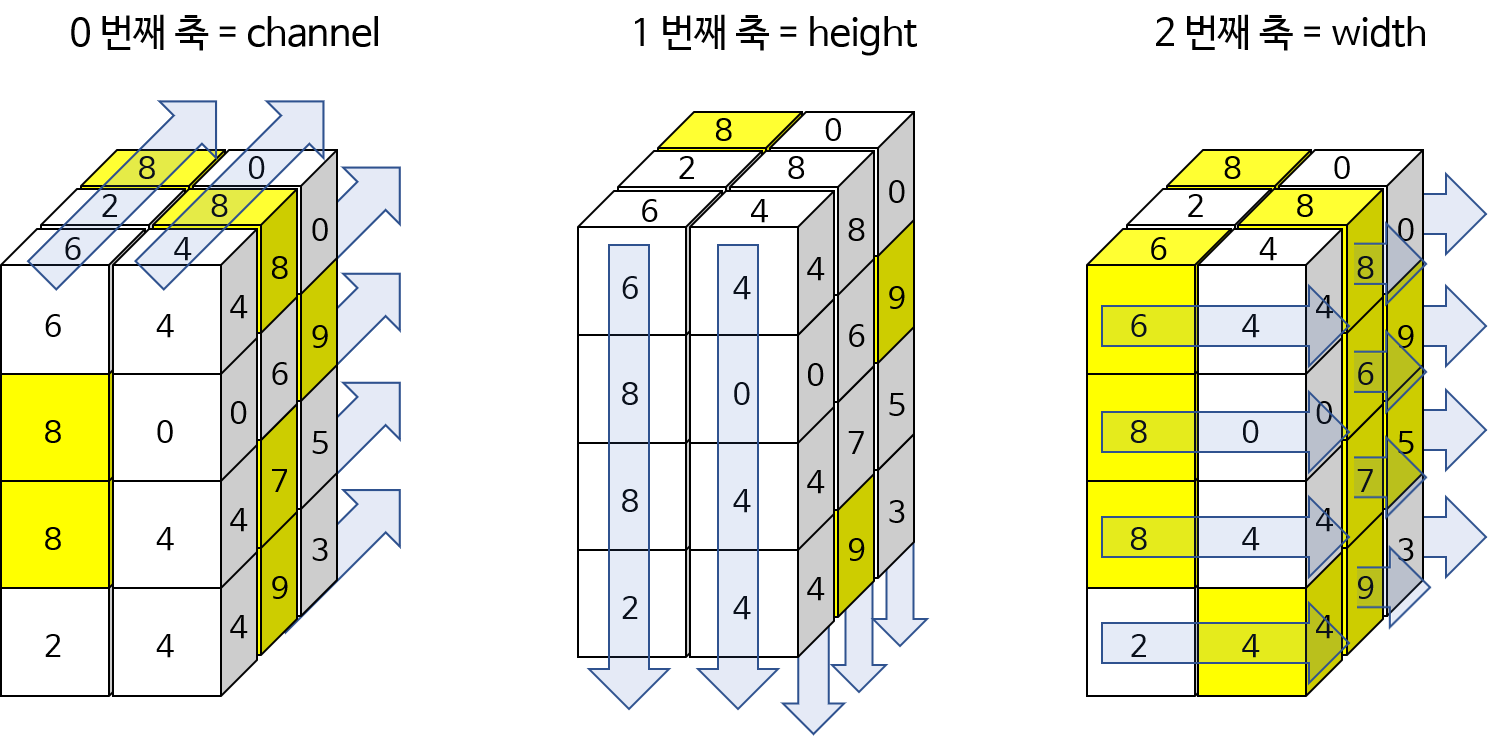

In [ ]:
tensor = torch.tensor([
    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[2, 4, 4],
     [6, 4, 4],
     [4, 3, 9]]
])

print("========================================")
# z방향
sum_dim0 = torch.sum(tensor, dim=0)
mean_dim0 = torch.mean(tensor.float(), dim=0)

print("Sum along dim=0:\n", sum_dim0)
print("Mean along dim=0:\n", mean_dim0)

print("========================================")
# 아래방향
sum_dim1 = torch.sum(tensor, dim=1)
mean_dim1 = torch.mean(tensor.float(), dim=1)

print("Sum along dim=1:\n", sum_dim1)
print("Mean along dim=1:\n", mean_dim1)

print("========================================")
# 옆방향
sum_dim2 = torch.sum(tensor, dim=2)
mean_dim2 = torch.mean(tensor.float(), dim=2)

print("Sum along dim=2:\n", sum_dim2)
print("Mean along dim=2:\n", mean_dim2)

Sum along dim=0:
 tensor([[14, 12,  4],
        [22, 12, 22],
        [20,  3, 19]])
Mean along dim=0:
 tensor([[4.6667, 4.0000, 1.3333],
        [7.3333, 4.0000, 7.3333],
        [6.6667, 1.0000, 6.3333]])
Sum along dim=1:
 tensor([[22,  8, 14],
        [22,  8, 14],
        [12, 11, 17]])
Mean along dim=1:
 tensor([[7.3333, 2.6667, 4.6667],
        [7.3333, 2.6667, 4.6667],
        [4.0000, 3.6667, 5.6667]])
Sum along dim=2:
 tensor([[10, 21, 13],
        [10, 21, 13],
        [10, 14, 16]])
Mean along dim=2:
 tensor([[3.3333, 7.0000, 4.3333],
        [3.3333, 7.0000, 4.3333],
        [3.3333, 4.6667, 5.3333]])


■ 중간문제: 곱셈,평균, 덧셈 훈련

In [ ]:
import numpy as np
import torch
# 작성 예시:
# 1. m1 = torch.tensor([[1, 2], [3, 4]])
#    m2 = torch.tensor([[5, 6], [7, 8]])
#    result = m1.matmul(m2)
#    답: tensor([[19, 22], [43, 50]])

# 2. m1 = torch.tensor([[2, 0], [1, 3]])
#    m2 = torch.tensor([[3, 4], [2, 1]])
#    result = m1.matmul(m2)
#    답:[[6, 8],[9, 7]]

# 3. m1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
#    m2 = torch.tensor([[7, 8], [9, 10], [11, 12]])
#    result = m1.matmul(m2)
#    답: [ 58,  64],[139, 154]]

# 4. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.mean()
#    답:tensor(2.5000)
# 5. t = torch.tensor([[3, 6], [9, 12]])
#    result = t.mean(dim=1) # dim =1 은 가
#    답:tensor([ 4.5000, 10.5000])

# 6. t = torch.tensor([[1, 1, 1], [2, 2, 2]])
#    result = t.mean(dim=0)
#    답: tensor([1.5000, 1.5000, 1.5000])

# 7. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.sum(dim=0)
#    답: tensor([4, 6])

# 8. t = torch.tensor([[2, 4], [6, 8]])
#    result = t.sum(dim=1)
#    답: tensor([ 6, 14])

# 9. t = torch.tensor([[1, 3], [5, 7]])
#    result = t.sum()
#    답: tensor(16)

# 10. m1 = torch.tensor([[2, 4, 6]])
#     m2 = torch.tensor([[1], [3], [5]])
#     result = m1.matmul(m2)
#     답: tensor([[44]])

# 11. m1 = torch.tensor([[5, 6], [7, 8]])
#     m2 = torch.tensor([[9, 10], [11, 12]])
#     result = m1.matmul(m2)
#     답: tensor([[111, 122], [143, 158]])

# 12. t = torch.FloatTensor([[2, 4], [6, 8]]) Float으로 바꿔줘야함 int형으로 지정되어있기 때문에
#     result = t.mean(dim=1) # 가
#     답: tensor([3.0000, 7.0000])

# 13. t = torch.tensor([[3, 3], [6, 6]])
#     result = t.mean(dim=0)
#     답: tensor([4.5000, 4.5000])

# 14. t = torch.tensor([[1, 1], [2, 2]])
#     result = t.sum(dim=1)
#     답: tensor([2, 4])

# 15. t = torch.tensor([[2, 2], [3, 3]])
#     result = t.sum()
#     답:tensor(10)

# 16. m1 = torch.tensor([[1, 0, 2], [-1, 3, 1]])
#     m2 = torch.tensor([[2, 3], [4, 5], [6, 7]])
#     result = m1.matmul(m2)
#     답: tensor([[14, 17], [16, 20]])

# 17. t = torch.tensor([[5, 10], [15, 20]])
#     result = t.mean(dim=1)
#     답:  tensor([ 7.5000, 17.5000])

# 18. t = torch.tensor([[2, 5, 8], [3, 6, 9]])
#     result = t.mean(dim=0)
#     답: tensor([2.5000, 5.5000, 8.5000])

# 19. t = torch.tensor([[1, 2], [3, 4]])
#     result = t.sum(dim=1)
#     답: tensor([3, 7])

# 20. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#     result = t.sum(dim=0)
#     답: tensor([ 8, 12, 16])


### 2. 텐서 조작 - 7) Max와 ArgMax => 중요!! classification에 사용

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.max(dim=0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [ ]:
print(t.max(dim=0)[0])

tensor([3., 4.])


In [ ]:
print(t.max(dim=0)[1]) #argmax와 같음

tensor([1, 1])


In [ ]:
print("argmax:", t.argmax(0) ) # 0 방향으로 최대값의 위치


# argmax란 텐서에서 가장 큰 값의 인덱스를 반환하는 것이다.

argmax: tensor([1, 1])


■ 중간문제: max, argmax 훈련

In [ ]:
# 1. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.max(t)
#    답: tensor(11)

# 2. t = torch.tensor([[4, 7, 2], [5, 8, 1]])
#    result = torch.max(t, dim=0)
#    답:tensor([5, 8, 2])

# 3. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.argmax(t, dim=1)
#    답: tensor([2, 2])

# 4. t = torch.tensor([[10, 20, 30], [40, 50, 60], [15, 25, 35]])
#    result = torch.max(t, dim=1)
#    답:  tensor([30, 60, 35])

# 5. t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#    result = torch.argmax(t)
#    답: tensor([0, 1])

# 6. t = torch.tensor([[0, 1, 2], [2, 1, 0], [3, 4, 5]])
#    result = torch.argmax(t, dim=0)
#    답:tensor(8)


# 7. t = torch.tensor([[8, 3, 7], [2, 9, 4]])
#    result = torch.argmax(t, dim=1)
#    답: tensor([0, 1])

# 8. t = torch.tensor([[9, 6, 3], [2, 5, 8]])
#     result = torch.max(t, dim=0)
#     답: tensor([9, 6, 8])


# 9. t = torch.tensor([[[1, 4, 7], [2, 5, 8]], [[3, 6, 9], [4, 7, 10]]])
#     result = torch.argmax(t, dim=2)
#     답: tensor([[2, 2], [2, 2]])


# 10. t = torch.tensor([[1, 2], [3, 4], [5, 6]])
#     result = torch.argmax(t, dim=1)
#     답: tensor([1, 1, 1])

# 11. t = torch.tensor([[2, 7, 1], [4, 3, 6], [5, 9, 0]])
#     result = torch.max(t, dim=1)
#     답: tensor([7, 6, 9])


# 12. t = torch.tensor([[4, 1, 6], [7, 2, 8], [3, 5, 9]])
#     result = torch.argmax(t, dim=0)
#     답: tensor([1, 2, 2])

# 13. t = torch.tensor([[10, 20, 30], [15, 25, 35], [5, 15, 25]])
#     result = torch.max(t, dim=1)
#     답: tensor([30, 35, 25])


### 2. 텐서 조작 - 8) 뷰(view)

In [ ]:
import numpy as np
import torch

t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [ ]:
# 차원부터 확인하자
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경 # 열만 3개로 맞추고 행은 알아서 자동맞춤 해주는 것
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))     # ? x 1 x 3 에 맞춰라, ?는 맞게 크기를 알아서 지정해라.
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 2. 텐서 조작 - 9) 스퀴지(Squeeze) - 1인 차원을 제거한다.

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 헷갈릴 수 있으니, 아래도 해보자! - 차원을 줄이는건 앞이던 뒤던 줄인다.

In [ ]:
ft = torch.FloatTensor([[0, 1, 2]])
print(ft)
print(ft.shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 2. 텐서 조작 - 10) 언스퀴지(Unsqueeze) - ★특정 위치★에 1인 차원을 추가한다.

In [ ]:
ft = torch.Tensor([0, 1, 2]) # 이게 중심으로 진행되니 shape을 꼭 기억하자.
print(ft.shape)

torch.Size([3])


### 차원추가① - Unsqueeze로 차원 추가해보기!

In [ ]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가② - view로도 Unsqueeze가 가능하다!

In [ ]:
print(ft.view(1, -1))      # 1 x ? 차원으로 만든다. ?의 의미가 뭐였죠~?
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가③ - 차원을 특정 위치에 추가해보자!

In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 2. 텐서 조작 - 11) 텐서타입은 뭐가 있나요?

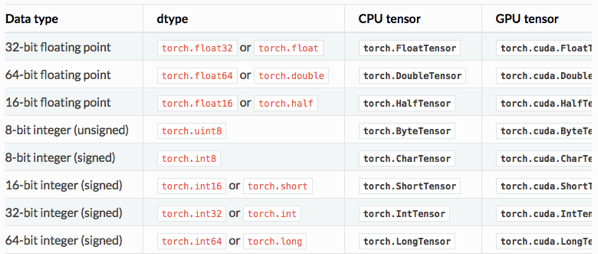

### 리스트를 텐서로 바꿀 때 타입 지정

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


### 텐서에서 타입지정

In [ ]:
print(bt.long()) # 뒤에 붙이기만해도 타입이 바뀐다!
print(bt.float()) # 뒤에 붙이기만해도 타입이 바뀐다!

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 2. 텐서 조작 - 12) 연결하기 : cat => 차원을 먼저 늘린 후에, 쌓아야 함

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 2. 텐서 조작 - 13) 쌓기 또는 스택킹(Stacking) => 알아서 차원이 늘어남

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
# 세로방향으로 쌓기
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# 가로방향으로 쌓기
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# cat은 좀 다르죠?
print(torch.cat([x, y, z], dim=0))

tensor([1., 4., 2., 5., 3., 6.])


In [ ]:
# 그래서 차원을 합칠때의 차원으로 먼저 만들어줘야 한다!
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### 2. 텐서 조작 - 14) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서


In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
print(torch.ones_like(x)) # x와 동일한 차원의 one 텐서를 만든다.

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(torch.zeros_like(x)) # x와 동일한 차원의 zero 텐서를 만든다.

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2. 텐서 조작 - 15) 덮어쓰기 연산 : 중요!!!


In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x) # 기존의 값 출력

tensor([[1., 2.],
        [3., 4.]])


### _를 붙이면 계산과 동시에 기존의 값을 덮어쓰기 합니다.

In [ ]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x) # 기존의 값 출력 (덮어쓰기 됨)

tensor([[2., 4.],
        [6., 8.]])


# 텐서 끝============================================================================

## 3. Pytorch 딥러닝

### 1) torch를 사용하여 선형회귀로 대략적인 구조를 알아보자

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 컴퓨터에 있는 random seed table은 컴퓨터마다 다르므로,
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [ ]:
# 데이터가 1, 2, 3 즉 3개가 있고, 정답 값도 2, 4, 6으로 3개가 있는걸 확인할 수 있다.
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# torch.FloatTensor : 토치에서는 텐서만 가능 (numpy는 안 됨)

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [ ]:
# 가중치 W를 0으로 초기화하고, 학습(back prop)을 통해 값이 변경되는 변수임(requires_grad=True)을 명시함.
W = torch.zeros(1, requires_grad=True)

# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [ ]:
# 가중치 b를 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시함.
b = torch.zeros(1, requires_grad=True)

# 가중치 b를 출력
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 확률적 경사하강법(SGD), 첫번째 인자는 최적화 시킬 learnable parameter를 주고([W, b]), 두번째 인자는 학습률(lr)을 명시해준다.
optimizer = optim.SGD([W, b], lr=0.01)

In [ ]:
nb_epochs = 100 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # 선형회귀 모델
    predict = x_train * W + b

                # [[1],   * [0]  => [[0],     + [0]   =[[0],
                #  [2],              [0],               [0],
                #  [3]]              [0],]              [0]]

    # cost 계산 (Mean Square Error)
    cost = torch.mean((predict - y_train) ** 2) # ** : 제곱

                      # [[0],   -    [[2],  =(   [[-2],
                      #  [0],         [4],        [-4]
                       # [0]]         [6]]        [-6] ])**2

    # cost로 모델 개선
    optimizer.zero_grad() # (n번 학습할 때마다) 기울기 초기화
    cost.backward() # cost를 기반으로 미분(접선의 기울기) 계산
    optimizer.step() # 오차역전파법(back prop) 실행

    # 100번마다 로그 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/100 W: 0.187, b: 0.080 Cost: 18.666666
Epoch   10/100 W: 1.224, b: 0.516 Cost: 1.844294
Epoch   20/100 W: 1.550, b: 0.638 Cost: 0.239337
Epoch   30/100 W: 1.655, b: 0.665 Cost: 0.083519
Epoch   40/100 W: 1.693, b: 0.662 Cost: 0.065829
Epoch   50/100 W: 1.709, b: 0.650 Cost: 0.061424
Epoch   60/100 W: 1.719, b: 0.636 Cost: 0.058413
Epoch   70/100 W: 1.726, b: 0.621 Cost: 0.055656
Epoch   80/100 W: 1.733, b: 0.607 Cost: 0.053039
Epoch   90/100 W: 1.739, b: 0.592 Cost: 0.050546
Epoch  100/100 W: 1.746, b: 0.578 Cost: 0.048171


### ※ optimizer.zero_grad()가 필요한 이유

### 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징(단점)이 있다

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)
optimizer = optim.SGD([w], lr=0.01)
nb_epochs = 20
for epoch in range(nb_epochs + 1):

  #optimizer.zero_grad()
  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


### 2) 다중 선형 회귀를 matmul로 구현해보자
* 다중(multinomial) 회귀: y = WX + WX + WX + b
* 비교: 다항(polynomial) 회귀: y = WX^2 + WX + b

In [ ]:
# 해석하자면, 5개의 데이터가 있고, 각 데이터(X)는 3개씩 특성(피처)이 있습니다. => X = 5 x 3
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])

# 데이터(X)가 5개니까 정답(Y)이 5개 => Y = X*W =  (5x3) * (3x1) = 5 x 1
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)     # 피처가 3개니까, y = wx + wx + wx + b => W = 3 x 1
b = torch.zeros(1, requires_grad=True)          # b는 브로드캐스팅 연산을 하므로, 1

In [ ]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # 모델
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    predict = x_train.matmul(W) + b


    # # [[첫번째 데이터 예측값]],
    #    [두번째 데이터 예측값]
    #    [세번째 데이터 예측값]
    #    [네번째 데이터 예측값]
    #    [다섯번째 데이터 예측값]]


    # cost 계산 Mean Square Error
    cost = torch.mean((predict - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} predict: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, predict.squeeze().detach(), cost.item() # detach는 기울기가 전파되지 않는 텐서를 만드는 것
    ))

Epoch    0/20 predict: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 predict: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 predict: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 predict: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 predict: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 predict: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 predict: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 predict: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 predict: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 predict: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 predict: tensor([153.5285, 184.48

In [ ]:
predict.detach().squeeze() #  grad_fn=<SqueezeBackward0> 이것을 없애려면 detach()를 해야한다.

tensor([154.0536, 185.1134, 175.7451, 198.6145, 141.2158])

### 3) 다중 선형 회귀를 nn과 F를 이용해서 학습해보자

In [ ]:
import torch
import torch.nn as nn   # nn : 방정식 만드는 모듈
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# 해석하자면, 5개의 데이터가 있고, 각 데이터는 3개씩 특성이 있습니다.
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])

# 데이터가 5개니까 정답이 5개
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)  # y = wx + wx + wx + b

In [ ]:
print(list(model.parameters())) # model.parameters()에는 weights 3개와 b 1개가 들어있다는 것을 확인할 수 있어요!

[Parameter containing:
tensor([[ 0.0803, -0.0707,  0.1601]], requires_grad=True), Parameter containing:
tensor([0.0285], requires_grad=True)]


In [ ]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 1e-5
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) # 첫번째 인자는 당연히 weight 3개와 b 1개가 들어있는 model.parameters() 겠죠?
                      # AdamW
                      # Ndam
                      # Adam

In [ ]:
# 전체 훈련 데이터에 대해 경사 하강법을 20번 반복
nb_epochs = 20
for epoch in range(nb_epochs+1):
    # 모델
    # # 오류 날 때 이 코드로 확인
    # print(x_train.shape)
    # break

    prediction = model(x_train)

    # cost 계산 F 모듈에 MSE를 지원해줍니다
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad() # gradient를 0으로 초기화
    cost.backward()     # 비용 함수를 미분하여 gradient 계산
    optimizer.step() # W와 b를 업데이트 (back prop)

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/20 Cost: 24927.478516
Epoch    1/20 Cost: 8017.396973
Epoch    2/20 Cost: 2582.311035
Epoch    3/20 Cost: 835.413940
Epoch    4/20 Cost: 273.940277
Epoch    5/20 Cost: 93.473770
Epoch    6/20 Cost: 35.466980
Epoch    7/20 Cost: 16.820354
Epoch    8/20 Cost: 10.824224
Epoch    9/20 Cost: 8.894237
Epoch   10/20 Cost: 8.271153
Epoch   11/20 Cost: 8.068062
Epoch   12/20 Cost: 8.000048
Epoch   13/20 Cost: 7.975366
Epoch   14/20 Cost: 7.964640
Epoch   15/20 Cost: 7.958415
Epoch   16/20 Cost: 7.953660
Epoch   17/20 Cost: 7.949344
Epoch   18/20 Cost: 7.945171
Epoch   19/20 Cost: 7.941058
Epoch   20/20 Cost: 7.936944


### 임의의 데이터로 학습된 모델에 넣어 예측해보자!

In [ ]:
# 임의의 데이터
new_var =  torch.FloatTensor([[73, 80, 75]])  # 데이터 x 피처갯수 # 1 x 3

# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) # 여기서 문제, 왜 predict 값이 2차원일까요? => 학습을 2차원으로 했기 때문에, 예측도 2차원으로

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.4641]], grad_fn=<AddmmBackward0>)


In [ ]:
# 훈련이 완료되었을 때 모델 파라미터들을 확인해보자.
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7042, 0.5523, 0.7711]], requires_grad=True), Parameter containing:
tensor([0.0357], requires_grad=True)]


### 4) 다중 선형회귀 클래스형태로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# 데이터까지는 동일
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
class MultivariateLinearRegression(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module 상속, 이와 같은 코드 super(MultivariateLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1) # 모델 선언 : 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x): # forward : 순전파 기능하는 특수 메소드
        return self.linear(x)

↑ nn.Module 상속하는 이유 https://daebaq27.tistory.com/60

In [ ]:
model = MultivariateLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 100
for epoch in range(nb_epochs+1):
    # 모델
    prediction = model(x_train) # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad() # gradient를 0으로 초기화
    cost.backward() # 비용 함수를 미분하여 gradient 계산
    optimizer.step() # W와 b를 업데이트

    if epoch % 10 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100 Cost: 30778.531250
Epoch   10/100 Cost: 12.019530
Epoch   20/100 Cost: 11.677732
Epoch   30/100 Cost: 11.617912
Epoch   40/100 Cost: 11.558427
Epoch   50/100 Cost: 11.499258
Epoch   60/100 Cost: 11.440420
Epoch   70/100 Cost: 11.381873
Epoch   80/100 Cost: 11.323689
Epoch   90/100 Cost: 11.265776
Epoch  100/100 Cost: 11.208154


### 5) 미니배치 학습을 구현해보자
* 미니배치 학습 목적/이유: 1) 리소스 한계 2) loss를 한번에 반영할 양을 조절

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋 : 인풋데이터와 정답값 데이터 짝궁
from torch.utils.data import DataLoader # 데이터로더  : 미니배치 사이즈로 짜르려고

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
dataset = TensorDataset(x_train, y_train) # 미니배치로 짜르기 전에, 데이터와 정답을 합친 후에 짤라야 한다. => ex) ([73,  80,  75], [152])

In [ ]:
print(list[dataset])

list[<torch.utils.data.dataset.TensorDataset object at 0x7d93289b5ab0>]


In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # 자, 그러면 마지막은 어떻게 될까?

In [ ]:
model = nn.Linear(3,1) # 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
a = [10,20,30,40]

for idx,value in enumerate(a):
  print(idx,value)

0 10
1 20
2 30
3 40


In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):  # 전체 데이터셋으로 몇번 학습할거냐
  for batch_idx, samples in enumerate(dataloader):  # enumerate : 값과 인덱스 return
    # print('번호',batch_idx) # 미니배치 번호
    # print('내용물',samples) # 미니배치 내용물 확인

    # break

    x_train, y_train = samples # 정답이랑 답이 묶여있으니까 쪼개줘야 하지 않는가?
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
#   break


Epoch    0/20 Batch 1/3 Cost: 65965.117188
Epoch    0/20 Batch 2/3 Cost: 8373.174805
Epoch    0/20 Batch 3/3 Cost: 5812.919922
Epoch    1/20 Batch 1/3 Cost: 1216.618164
Epoch    1/20 Batch 2/3 Cost: 645.369263
Epoch    1/20 Batch 3/3 Cost: 127.255241
Epoch    2/20 Batch 1/3 Cost: 37.524319
Epoch    2/20 Batch 2/3 Cost: 18.775902
Epoch    2/20 Batch 3/3 Cost: 2.802569
Epoch    3/20 Batch 1/3 Cost: 0.431170
Epoch    3/20 Batch 2/3 Cost: 4.675200
Epoch    3/20 Batch 3/3 Cost: 0.122333
Epoch    4/20 Batch 1/3 Cost: 1.901812
Epoch    4/20 Batch 2/3 Cost: 0.990660
Epoch    4/20 Batch 3/3 Cost: 0.552270
Epoch    5/20 Batch 1/3 Cost: 0.213718
Epoch    5/20 Batch 2/3 Cost: 0.960650
Epoch    5/20 Batch 3/3 Cost: 3.808739
Epoch    6/20 Batch 1/3 Cost: 1.877081
Epoch    6/20 Batch 2/3 Cost: 1.637260
Epoch    6/20 Batch 3/3 Cost: 0.623921
Epoch    7/20 Batch 1/3 Cost: 0.959517
Epoch    7/20 Batch 2/3 Cost: 0.297821
Epoch    7/20 Batch 3/3 Cost: 3.287425
Epoch    8/20 Batch 1/3 Cost: 2.118677
Epoch 

In [ ]:
# 임의의 데이터
new_var =  torch.FloatTensor([[73, 80, 75]])

# 입의의 데이터로 추론
pred_y = model(new_var) # 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.2794]], grad_fn=<AddmmBackward0>)


### 실습) 다음 조건을 만족하는 다중 선형회귀 학습을 짜시오

1. 데이터는 아래 데이터 그대로 사용할 것
2. 그에 맞는 다중 선형회귀를 클래스 형태로 짤 것.
3. 미니배치사이즈 4
4. 에폭 10
5. 옵티마이저, loss 마음대로 선택. 단, 성능은 신경쓰지 말 것.
6. import는 마음대로 넣을 것.
7. x_test 변수를 이용해 예측해서 결과를 출력하고 기울기함수를 해제하시오: detach 사용

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75, 88],
                               [93,  88,  93, 87],
                               [89,  91,  90, 95],
                               [96,  98,  93, 95],
                               [73,  66,  70, 77],
                               [77,  82,  75, 86],
                               [88,  75,  91, 90]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142], [151], [155]])

In [ ]:
dataset = TensorDataset(x_train,y_train)

In [ ]:
# DataLoader 및 모델 정의
dataloader = DataLoader(dataset, batch_size =4,shuffle = True) # 미니배치사이즈 4

In [ ]:
class MultivariateLinearRegression2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(4, 1)  # 입력 특성 4개, 출력 1개

    def forward(self, x): # forward : 순전파 기능하는 특수 메소드
        return self.linear(x)


In [ ]:
model = MultivariateLinearRegression2()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# 학습
nb_epochs = 10
for epoch in range(nb_epochs +1):
    for batch_idx, samples in enumerate( dataloader):
        x_batch, y_batch = samples  # 미니배치에서 x와 y를 분리

        # 순전파 및 손실 계산
        prediction = model(x_train)
        cost = F.mse_loss(prediction,y_train)

        # 역전파 및 가중치 갱신
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()




        print('Epoch {:4d}/{} Predict: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, prediction.squeeze().detach(), cost.item() # detach는 기울기가 전파되지 않는 텐서를 만드는 것
        ))

Epoch    0/10 Predict: tensor([-50.3057, -50.5678, -54.6963, -54.1636, -42.8934, -48.4401, -52.1382]) Cost: 47278.878906
Epoch    0/10 Predict: tensor([66.8001, 83.0003, 80.4616, 87.2042, 63.0817, 70.0931, 75.2984]) Cost: 8361.963867
Epoch    1/10 Predict: tensor([115.9592, 139.0706, 137.1992, 146.5498, 107.5674, 119.8522, 128.7919]) Cost: 1504.047974
Epoch    1/10 Predict: tensor([136.5954, 162.6086, 161.0170, 171.4637, 126.2407, 140.7410, 151.2454]) Cost: 295.536835
Epoch    2/10 Predict: tensor([145.2582, 172.4900, 171.0157, 181.9237, 134.0784, 149.5104, 160.6686]) Cost: 82.559097
Epoch    2/10 Predict: tensor([148.8947, 176.6386, 175.2133, 186.3163, 137.3675, 153.1924, 164.6220]) Cost: 45.013309
Epoch    3/10 Predict: tensor([150.4212, 178.3806, 176.9758, 188.1617, 138.7472, 154.7387, 166.2793]) Cost: 38.381924
Epoch    3/10 Predict: tensor([151.0620, 179.1124, 177.7159, 188.9380, 139.3252, 155.3885, 166.9726]) Cost: 37.198303
Epoch    4/10 Predict: tensor([151.3310, 179.4202, 178.

In [ ]:
# 테스트
x_test = torch.FloatTensor([[73,  80,  75, 88]])
model.eval()
pred_y =model(x_test)
# detach()를 사용하여 기울기 계산을 해제하고 텐서 값을 가져오기
predicted_value = pred_y.detach().numpy()  # 또는 .item()을 사용해 단일 값을 가져올 수 있습니다.

# 예측 결과 출력
print(f'예측 결과: {predicted_value}')

# 추가로, 훈련 후 예측 결과 출력
print("훈련 후 입력이 73, 80, 75, 88일 때의 예측값 :", pred_y.detach().item())

예측 결과: [[151.52525]]
훈련 후 입력이 73, 80, 75, 88일 때의 예측값 : 151.52525329589844


### 6) 커스텀 데이터셋을 이용해서 다중 선형회귀 모델을 학습해보자

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Dataset 상속
class CustomDataset(Dataset):   # CustomDataset : 특수 메소드
  def __init__(self): # 데이터 load 또는 선언, 그리고 전처리를 정의하는 곳
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
    #여기선 보통 파일을 불러온다. 파일경로를 가져오거나

  def __len__(self): # 총 데이터의 개수를 구하는 이벤트가 발생할 때, 실행되는 함수
    return len(self.x_data)

  def __getitem__(self, idx):  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
                               # idx가 뭔지 생각해보자.
    #print("반응함", idx)
    # 여기서 transform 함수를 데이터에 적용하기도 한다
    x = torch.FloatTensor(self.x_data[idx]) # 몇번 째 데이터를 뽑아내서 텐서로 바꿔줌
    y = torch.FloatTensor(self.y_data[idx])
    return x, y
    # 데이터를 뽑아낼 때 반응하는 인스턴스

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = torch.nn.Linear(3,1) # y = w1x1+w2x2+w3x3 + b 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 23097.042969
Epoch    0/20 Batch 2/3 Cost: 16247.284180
Epoch    0/20 Batch 3/3 Cost: 4889.567871
Epoch    1/20 Batch 1/3 Cost: 745.532104
Epoch    1/20 Batch 2/3 Cost: 162.640839
Epoch    1/20 Batch 3/3 Cost: 86.018715
Epoch    2/20 Batch 1/3 Cost: 28.660686
Epoch    2/20 Batch 2/3 Cost: 0.937347
Epoch    2/20 Batch 3/3 Cost: 2.633588
Epoch    3/20 Batch 1/3 Cost: 0.418087
Epoch    3/20 Batch 2/3 Cost: 4.101724
Epoch    3/20 Batch 3/3 Cost: 0.033634
Epoch    4/20 Batch 1/3 Cost: 0.167627
Epoch    4/20 Batch 2/3 Cost: 3.474001
Epoch    4/20 Batch 3/3 Cost: 1.437650
Epoch    5/20 Batch 1/3 Cost: 3.029596
Epoch    5/20 Batch 2/3 Cost: 1.065502
Epoch    5/20 Batch 3/3 Cost: 0.521064
Epoch    6/20 Batch 1/3 Cost: 0.237241
Epoch    6/20 Batch 2/3 Cost: 0.178056
Epoch    6/20 Batch 3/3 Cost: 7.091702
Epoch    7/20 Batch 1/3 Cost: 1.706315
Epoch    7/20 Batch 2/3 Cost: 2.137130
Epoch    7/20 Batch 3/3 Cost: 1.003604
Epoch    8/20 Batch 1/3 Cost: 0.348842
Epoch   

###실습) 누군가 학습 코드를 망가뜨려 놓았다. 잘 돌아가도록 코드를 수정하시오.

In [ ]:
import torch  # 딥러닝 프레임워크 파이토치 불러오기
import torch.autograd # 자동 미분(back prop)을 위함 함수들 포함
import torch.nn # 간단한 선형 방정식 정의, 다양한 레이어, 활성화 함수,
import torch.optim # 최적화 알고리즘들이 담겨있는 모듈
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
class MultivariateLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear( 3 ,1  ) #수정

    def forward(self, x):
        return self.linear(x)

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) #수정
model = MultivariateLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) #수정

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1): #수정
  for batch_idx, samples in enumerate(dataloader): #수정
    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train) #수정  # 예측값과 실제값 간의 평균 제곱 오차 계산

    # 기울기 초기화
    optimizer.zero_grad() #수정  # 이전 기울기를 0으로 초기화; 기울기는 기본적으로 누적됨
    # 역전파
    cost.backward() #수정  # 손실에 대한 기울기를 계산
    # 파라미터 업데이트
    optimizer.step() #수정 # 계산된 기울기를 사용하여 모델 파라미터 업데이트


    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 65142.042969
Epoch    0/20 Batch 2/3 Cost: 8932.504883
Epoch    0/20 Batch 3/3 Cost: 6619.495605
Epoch    1/20 Batch 1/3 Cost: 1506.655518
Epoch    1/20 Batch 2/3 Cost: 256.161011
Epoch    1/20 Batch 3/3 Cost: 203.189941
Epoch    2/20 Batch 1/3 Cost: 30.200806
Epoch    2/20 Batch 2/3 Cost: 4.937366
Epoch    2/20 Batch 3/3 Cost: 15.460078
Epoch    3/20 Batch 1/3 Cost: 2.143462
Epoch    3/20 Batch 2/3 Cost: 5.263210
Epoch    3/20 Batch 3/3 Cost: 1.431765
Epoch    4/20 Batch 1/3 Cost: 0.904930
Epoch    4/20 Batch 2/3 Cost: 6.060987
Epoch    4/20 Batch 3/3 Cost: 3.731884
Epoch    5/20 Batch 1/3 Cost: 2.748391
Epoch    5/20 Batch 2/3 Cost: 5.288267
Epoch    5/20 Batch 3/3 Cost: 2.532214
Epoch    6/20 Batch 1/3 Cost: 5.559232
Epoch    6/20 Batch 2/3 Cost: 2.432797
Epoch    6/20 Batch 3/3 Cost: 3.156239
Epoch    7/20 Batch 1/3 Cost: 3.963197
Epoch    7/20 Batch 2/3 Cost: 3.503451
Epoch    7/20 Batch 3/3 Cost: 1.718173
Epoch    8/20 Batch 1/3 Cost: 0.593071
Epoch 

In [ ]:
from inspect import signature

signature(torch.optim.SGD)

<Signature (params, lr: float = 0.001, momentum: float = 0, dampening: float = 0, weight_decay: float = 0, nesterov=False, *, maximize: bool = False, foreach: Optional[bool] = None, differentiable: bool = False, fused: Optional[bool] = None)>

In [ ]:
import sklearn.preprocessing

dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 'TargetEncoder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 '_target_encoder',
 '_target_encoder_fast',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

# 파이토치 선형회귀 끝
================================================================================

### 7) Multi Layer Perceptron == MLP == 다층퍼셉트론을 통한 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X = torch.randn(100, 10)  # 임의의 입력 데이터 (100개 데이터, 10차원)
y = torch.randn(100, 1)   # 임의의 출력 랜덤 데이터 (100개 데이터, 1차원)

dataset = TensorDataset(X, y)   # 인풋데이터와 아웃풋을 짝궁으로 묶어준다.
dataloader = DataLoader(dataset, batch_size=10, shuffle=True) #배치사이즈 10개씩 묶는다.

class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(10, 64) # 10개 입력, 64개 아웃풋
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1) # 1개 출력

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        predictions = model(batch_X)

        loss = criterion(predictions, batch_y)
        optimizer.zero_grad()

        # 기울기 계산 후 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.4768
Epoch [20/100], Loss: 1.7536
Epoch [30/100], Loss: 1.3886
Epoch [40/100], Loss: 1.1051
Epoch [50/100], Loss: 1.3689
Epoch [60/100], Loss: 1.6026
Epoch [70/100], Loss: 0.6283
Epoch [80/100], Loss: 0.8116
Epoch [90/100], Loss: 1.4872
Epoch [100/100], Loss: 1.0012


In [ ]:
# 모델 평가 모드

# model.train() : 학습모드

model.eval() # 드롭아웃(dropout)과 배치 정규화(batch normalization)와 같은 레이어가 고정됨
with torch.no_grad(): # 기울기를 안구하겠다고 정의, optimizer.step()을 안하면 되지 않냐라고 볼 수 있지만,
                      # autograd 엔진이 그래디언트 계산을 위한 기록을 하지 않기 때문에 메모리를 더 적게 사용
    predictions = model(X)
    loss = criterion(predictions, y)
    print(f'Final Loss: {loss.item():.4f}')


Final Loss: 1.1481


## 8) wine.csv 데이터를 이용하여 MLP 학습 및 평가 모델을 만들어보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('wine.csv')

# 입력과 출력 분리
X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# 텐서 변환 (직관적인 방식)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # 열 벡터
X_valid = torch.FloatTensor(X_valid)
y_valid = torch.FloatTensor(y_valid).view(-1, 1) # 열 벡터
# 텐서 변환 (유연한 데이터 비트 정의 방식)
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_valid = torch.tensor(X_valid, dtype=torch.float32)
# y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64) # feature 개수로 input을 설정한거임
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:

        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 2.2132
Epoch [4/10], Loss: 0.9182
Epoch [6/10], Loss: 0.4925
Epoch [8/10], Loss: 0.6778
Epoch [10/10], Loss: 0.4150


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 loss: {loss.item():.4f}')


평가 loss: 0.4271


In [ ]:
print(f"예측 값: {predictions[:5].view(-1).tolist()}") # 상위 5개만 찍어서 본거임
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


예측 값: [11.937767028808594, 9.26179027557373, 11.812004089355469, 9.599116325378418, 9.298057556152344]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 9) 파생변수 만들어서 학습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:


# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!) ,# kmeans 클러스터링까지 정규화하면 그 kmeans 파생변수의 뜻을 다하지 못함
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.7684
Epoch [4/10], Loss: 0.6267
Epoch [6/10], Loss: 0.2910
Epoch [8/10], Loss: 0.4623
Epoch [10/10], Loss: 0.1037


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 loss: {loss.item():.4f}')


평가 loss: 0.4526


In [ ]:
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


예측 값: [12.565786361694336, 9.467826843261719, 11.47228717803955, 9.56679916381836, 8.745335578918457]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 실습) 파생변수 만들고 아래 3가지 중 1개 스케일러를 사용해서 학습해보자
#### 1) Standard Scaler
#### 2) MinMax Scaler
#### 3) Robust Scaler

#### 조건) 클러스터 갯수, 모델 히든사이즈 다르게 작성할 것

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # 힌트

# 데이터 로드
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택


# 아래 마저 완성
# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

cluster_labels




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = RobustScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!) ,# kmeans 클러스터링까지 정규화하면 그 kmeans 파생변수의 뜻을 다하지 못함
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.8457
Epoch [4/10], Loss: 0.6156
Epoch [6/10], Loss: 0.2786
Epoch [8/10], Loss: 0.1938
Epoch [10/10], Loss: 0.0920


### 10) kfold를 사용해보자 (StratifiedKFold, TimeSeriesKFold는 현재 회귀 데이터에 적합하지 않다.)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 데이터 로드
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler = StandardScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터를 텐서로 변환
X_extended = torch.tensor(X_extended, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_extended.shape[1], 64)  # 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# 교차 검증 루프
fold = 1
valid_losses = [] # 매 fold마다 loss를 저장할 것이다. 5 fold니까 총 5개의 loss를 담을 수 있다.
for train_index, valid_index in kf.split(X_extended): # kf.split X_extended 데이터에서 5flod에서 첫번 째 train 데이터(인풋,정답)
                                                      # valid 데이터 (인풋,정답) 인덱스를 각각 가져온다. (인덱스와 y_train 인덱스를 달라고 요청하는 것)
    #print(train_index, valid_index)
    #break
    # 학습 및 검증 데이터 분리, 이때 매번 kfold의 인덱스를 가져와서 인덱싱 해온다.
    X_train, X_valid = X_extended[train_index], X_extended[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # 데이터셋과 데이터로더로 변환
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    model = MLPRegression()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    num_epochs = 10

    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()

        if (epoch+1) % 2 == 0:
            print(f'Fold [{fold}], Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # 평가 모드로 바꾼다.
    model.eval()
    with torch.no_grad():
        predictions = model(X_valid)
        valid_loss = criterion(predictions, y_valid)
        valid_losses.append(valid_loss.item())
        print(f'Fold [{fold}] Valid Loss: {valid_loss.item():.4f}')

    fold += 1

# 최종적으로 평가 손실 출력
print(f'\n평균 평가 손실: {np.mean(valid_losses):.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fold [1], Epoch [2/10], Loss: 0.5458
Fold [1], Epoch [4/10], Loss: 0.7304
Fold [1], Epoch [6/10], Loss: 0.8278
Fold [1], Epoch [8/10], Loss: 0.2986
Fold [1], Epoch [10/10], Loss: 0.1483
Fold [1] Valid Loss: 0.4776
Fold [2], Epoch [2/10], Loss: 1.0948
Fold [2], Epoch [4/10], Loss: 0.5904
Fold [2], Epoch [6/10], Loss: 0.7634
Fold [2], Epoch [8/10], Loss: 0.4451
Fold [2], Epoch [10/10], Loss: 1.0050
Fold [2] Valid Loss: 0.4305
Fold [3], Epoch [2/10], Loss: 0.5648
Fold [3], Epoch [4/10], Loss: 0.9235
Fold [3], Epoch [6/10], Loss: 1.4316
Fold [3], Epoch [8/10], Loss: 0.5523
Fold [3], Epoch [10/10], Loss: 0.1603
Fold [3] Valid Loss: 0.4818
Fold [4], Epoch [2/10], Loss: 0.8085
Fold [4], Epoch [4/10], Loss: 1.3070
Fold [4], Epoch [6/10], Loss: 0.9523
Fold [4], Epoch [8/10], Loss: 0.4738
Fold [4], Epoch [10/10], Loss: 0.3438
Fold [4] Valid Loss: 0.4497
Fold [5], Epoch [2/10], Loss: 1.0010
Fold [5], Epoch [4/10], Loss: 1.1024
Fold [5], Epoch [6/10], Loss: 0.3977
Fold [5], Epoch [8/10], Loss: 0.3

### 11) 레이어를 많이 쌓아보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler() # --> 리스케일링
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)  # 히든 레이어 3층이상이기에 DNN(딥러닝)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x)) # forward는 층 수 만큼 쌓아준다.
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')

    # tensor -> Numpy로 변환하여 계산
    y_valid_np = y_valid.numpy()
    predictions_np = predictions.numpy()

    r2 = r2_score(y_valid_np, predictions_np)
    rmse = np.sqrt(mean_squared_error(y_valid_np, predictions_np))
    mae = mean_absolute_error(y_valid_np, predictions_np)
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.5097
Epoch [4/10], Loss: 0.2743
Epoch [6/10], Loss: 0.2005
Epoch [8/10], Loss: 0.4419
Epoch [10/10], Loss: 0.2556
평가 손실 Loss: 0.3259
R2 Score: 0.7727
RMSE: 0.5709
MAE: 0.4283
예측 값: [11.931273460388184, 9.666515350341797, 12.208916664123535, 9.651994705200195, 9.099431037902832]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 실습) 모델을 한번 쌓고, 노드(퍼셉트론)를 늘려보고, 나만의 모델을 만들어보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1],  32  )  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(32,64)
        self.layer3 = nn.Linear(64,128)
        self.layer4 = nn.Linear(128,64)
        self.layer5 = nn.Linear(64,32)
        self.layer6 = nn.Linear(32,16)
        # 더 늘려도 됩니다.
        self.output_layer = nn.Linear( 16 , 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))

        # 채우시오.


        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.4917
Epoch [4/10], Loss: 0.5006
Epoch [6/10], Loss: 0.4022
Epoch [8/10], Loss: 0.3303
Epoch [10/10], Loss: 0.2444
평가 손실 Loss: 0.3658
예측 값: [11.52978801727295, 10.03002643585205, 12.052141189575195, 9.61688232421875, 9.087150573730469]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 12) 어떤 옵티마이저들이 있을까 (학습률 decay, 규제(weight decay) 적용)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()

# weight decay 즉, 규제 패널티 강도는 weight 크기가 줄어들도록(오버피팅일 때), 학습률 dacy는 보폭을 줄도록 (loss 값이 날뛸 때 즉, Over shooting 일 때)

                                                  # 규제 패널티 강도 0.1 (weight decay), 모델의 가중치가 커지지 않도록 제어, 오버피팅 일때 써봄직함
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.NAdam(model.parameters(), lr=0.001, weight_decay=0.1)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1) # 2번 학습(epoch)할때마다 학습률값에서 10% 감소한 수치로 조정 (learning rate decay)

# 옵티마이져를 스케듈러를 써서 조절할 수 있다.

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    # 학습률 decay
    scheduler.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.6966
Epoch [4/10], Loss: 0.2905
Epoch [6/10], Loss: 0.5331
Epoch [8/10], Loss: 0.6452
Epoch [10/10], Loss: 1.8163
평가 손실 Loss: 0.7062
예측 값: [11.940629959106445, 9.111295700073242, 10.856183052062988, 9.811785697937012, 9.109477043151855]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 13) Early stop, tqdm, log를 남겨보자

In [ ]:
from tqdm import tqdm

# tqdm 시간이 얼마나 오래걸릴지 측정하는 것
count = 0
for i in tqdm(range(10000000)):
  count +=1

count = 1

100%|██████████| 10000000/10000000 [00:05<00:00, 1890477.02it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import os

data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# Early Stopping 설정
early_stopping_patience = 5  # 평가 loss 개선이 없을 경우, 모델한테 줄 기회 횟수.
early_stopping_counter = 0
best_loss = float('inf') # 맨 처음 loss를 모르니깐 무한으로 잡아놓고 bestloss를 갱신할거다.

# 로그 파일(현재 작업 디렉토리에 저장이 된다.)
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

num_epochs = 10

pbar = tqdm(range(num_epochs), desc="Training")

# tqdm으로 에폭 루프 감싸기
for epoch in pbar:
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:

        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

        # 에폭 손실 계산
        epoch_loss += loss.item()

    # 학습률 업데이트
    scheduler.step()

    # 평가 손실 계산
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_valid)
        val_loss = criterion(val_predictions, y_valid)

    # log 파일에다가 정보 기록
    with open(log_file, "a") as f:
        f.write(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

    # tqdm 진행 표시줄에 정보 반영
    pbar.set_postfix({'Loss': f'{epoch_loss/len(train_loader):.4f}', 'Valid Loss': f'{val_loss.item():.4f}'})

    # validation loss가 현재까지 갱신된 최저 loss보다 적다면 best loss를 갱신 , # Early stop을 하기 위한 코드
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        early_stopping_counter = 0

        # 성능이 뛰어날때 마다 모델을 저장
        torch.save(model.state_dict(), "best_model.pth")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f"조기종료 epoch: {epoch+1}")
            break

# 모델 불러온 다음에 예측
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    final_loss = criterion(predictions, y_valid)
    print(f'\nFinal 평가 손실 Loss: {final_loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Training: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s, Loss=0.5218, Valid Loss=0.6152]


Final 평가 손실 Loss: 0.6152
예측 값: [12.219001770019531, 9.588970184326172, 11.621359825134277, 9.802639961242676, 9.2554292678833]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]



<ipython-input-5-2dd07d5f88b0>:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


### 14) 가중치 초기화, 배치노말, 드롭아웃을 적용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)   # 배치노말 : 배치노말 인자는 아웃풋 사이즈에 맞추면된다.
        self.dropout1 = nn.Dropout(0.5) # 드롭아웃

        self.layer2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(128, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(32, 1)

        # 가중치 초기화를 밑에서 정의했음
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules(): # 딥러닝 모델의 모든 층을 훑음
            if isinstance(m, nn.Linear): # 만약 그 부분이 Layer 라면
                nn.init.xavier_uniform_(m.weight) # 그 부분의 웨이트를 자비에 유니폼으로 초기화한다.
                if m.bias is not None: # 만약 그 Layer가 None이 아니라면 0으로 초기화한다.
                    nn.init.zeros_(m.bias)

# 모델, 손실 함수, 옵티마이저 설정
model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 9.5438
Epoch [4/10], Loss: 8.9491
Epoch [6/10], Loss: 7.5224
Epoch [8/10], Loss: 6.4373
Epoch [10/10], Loss: 5.9476
평가 손실 Loss: 1.7795
예측 값: [9.952756881713867, 9.890437126159668, 10.10421371459961, 9.494795799255371, 9.55027961730957]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 15) GPU 학습 (데이터가 크거나, 모델이 클 때 학습 속도가 개선되는걸 체감)

In [ ]:
# 파이토치 라이브러리에서 GPU를 접근할 수 있는지 확인
import torch

torch.cuda.is_available()

True

In [ ]:
# GPU 종류 , GPU RAM인, VRAM의 용량 확인, GPU에 올라가 있는 프로세스 확인
! nvidia-smi

Wed Sep  4 07:15:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time  # 시간 측정을 위한 모듈

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(128, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(32, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# 모델, 손실 함수, 옵티마이저 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU가 사용 가능한지 확인 #GPU가 된다면 cuda로 안된다면 cpu로 진행
model = DNNRegression().to(device)  # 모델을 GPU로 이동
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

# 학습 시간 측정 시작
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 데이터를 GPU로 이동

        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 학습 시간 측정 종료
end_time = time.time()
elapsed_time = end_time - start_time

model.eval()
with torch.no_grad():
    X_valid, y_valid = X_valid.to(device), y_valid.to(device)  # 검증 데이터도 GPU로 이동
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')

# 결과 출력
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

# 전체 학습 시간 출력
print(f"총 학습 시간: {elapsed_time:.2f}초")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 4.7467
Epoch [4/10], Loss: 5.1851
Epoch [6/10], Loss: 3.7636
Epoch [8/10], Loss: 5.8412
Epoch [10/10], Loss: 7.1788
평가 손실 Loss: 1.4677
예측 값: [10.841021537780762, 10.095678329467773, 10.560635566711426, 10.184555053710938, 9.454745292663574]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]
총 학습 시간: 3.17초


# 실습) 아래 정의된 와인 데이터를 가지고 아래 조건을 충족하여 학습 및 평가 코드를 작성하자.

1. 모델의 레이어는 5층 이상으로 노드수는 마음대로. (Drop Out과, 자비에 유니폼 초기화, 배치노말라이제이션 적용해보기)
2. Adam에 weight decay 0.1, learning rate decay 0.1을 설정 할 것.
3. kfold 5 적용.
4. tqdm과 early stopping 설정, best model을 저장하도록 할 것.
5. GPU를 통한 학습 및 평가 할 것

In [ ]:
# 강사님이 한거
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os
# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')
X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택
# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values
# 데이터 정규화
scaler = RobustScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화
# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)
        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, 1)
        # 가중치 초기화
        self._initialize_weights()
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64
# K-Fold Cross Validation
kf = KFold(n_splits= 5,  shuffle=True, random_state=42)
fold = 1
# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')
# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)
# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
valid_losses = []
for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[  train_index   ], X_tensor[   val_index     ]
    y_train_fold, y_valid_fold = y_tensor[  train_index   ], y_tensor[     val_index   ]
    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr= 0.001 , weight_decay= 0.1 )
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2 , gamma = 0.1)
    # 학습 시간 측정 시작
    start_time = time.time()
    # 모델 epoch 다 돌고 조기종료 0으로 초기화.
    early_stopping_counter = 0
    best_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to( device)  # 데이터를 GPU로 이동
            predictions = model(batch_X)
            # 손실 계산
            loss = criterion(predictions, batch_y)
            # 옵티마이저 초기화
            optimizer.zero_grad()
            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # 학습률 업데이트
        scheduler.step()
        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)
        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")
        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")
        # Early Stopping
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0
            # 성능이 뛰어날때 마다 모델을 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch: {epoch+1}")
                break
    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        predictions = model(X_valid_fold)
        final_loss = criterion(predictions, y_valid_fold)
        valid_losses.append(criterion(predictions, y_valid_fold))
        print(f"Fold {fold} 평가 손실 Loss: {final_loss.item():.4f}")
        print(f"Fold {fold} 예측 값: {predictions[:5].view(-1).tolist()}")
        print(f"Fold {fold} 실제 값: {y_valid_fold[:5].view(-1).tolist()}")
    fold += 1
# Kfold의 loss 모음
print(valid_losses)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fold 1, Epoch 1/10, Loss: 89.8056, Valid Loss: 74.6352
Fold 1, Epoch 2/10, Loss: 46.7515, Valid Loss: 33.4460
Fold 1, Epoch 3/10, Loss: 29.4965, Valid Loss: 29.5296
Fold 1, Epoch 4/10, Loss: 27.4470, Valid Loss: 27.6439
Fold 1, Epoch 5/10, Loss: 26.2529, Valid Loss: 27.3494
Fold 1, Epoch 6/10, Loss: 25.5531, Valid Loss: 26.2059
Fold 1, Epoch 7/10, Loss: 25.4497, Valid Loss: 26.7989
Fold 1, Epoch 8/10, Loss: 25.7870, Valid Loss: 26.9826
Fold 1, Epoch 9/10, Loss: 25.3841, Valid Loss: 26.3536
Fold 1, Epoch 10/10, Loss: 25.9531, Valid Loss: 25.2696
Fold 1 평가 손실 Loss: 25.2696
Fold 1 예측 값: [6.151513576507568, 4.635654449462891, 4.728363037109375, 3.6310462951660156, 3.233269214630127]
Fold 1 실제 값: [9.5, 9.199999809265137, 9.199999809265137, 9.300000190734863, 9.199999809265137]


<ipython-input-3-f7d0286084b0>:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 2, Epoch 1/10, Loss: 93.9855, Valid Loss: 82.5432
Fold 2, Epoch 2/10, Loss: 51.7649, Valid Loss: 42.3394
Fold 2, Epoch 3/10, Loss: 34.5809, Valid Loss: 39.2622
Fold 2, Epoch 4/10, Loss: 32.0437, Valid Loss: 35.2852
Fold 2, Epoch 5/10, Loss: 30.2819, Valid Loss: 35.4363
Fold 2, Epoch 6/10, Loss: 30.4638, Valid Loss: 35.0319
Fold 2, Epoch 7/10, Loss: 30.3832, Valid Loss: 33.5576
Fold 2, Epoch 8/10, Loss: 30.3693, Valid Loss: 35.0413
Fold 2, Epoch 9/10, Loss: 30.1412, Valid Loss: 35.2336
Fold 2, Epoch 10/10, Loss: 29.9080, Valid Loss: 33.8153
Fold 2 평가 손실 Loss: 33.5576
Fold 2 예측 값: [4.579537868499756, 5.46358060836792, 4.226834297180176, 4.382215976715088, 4.600937843322754]
Fold 2 실제 값: [9.899999618530273, 9.5, 10.100000381469727, 10.300000190734863, 9.5]
Fold 3, Epoch 1/10, Loss: 85.9954, Valid Loss: 75.7461
Fold 3, Epoch 2/10, Loss: 44.6885, Valid Loss: 39.7090
Fold 3, Epoch 3/10, Loss: 29.0890, Valid Loss: 35.6362
Fold 3, Epoch 4/10, Loss: 26.4330, Valid Loss: 33.2870
Fold 3, Epo

In [ ]:
# 내가한거
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans( n_clusters=3,random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler =  StandardScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear( X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(256, 128)
        self.bn4 =nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(64, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)



        # 채우시오




        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64

# K-Fold Cross Validation
kf = KFold(n_splits= 5     ,  shuffle=True, random_state=42)
fold = 1

# Early Stopping 설정
early_stopping_patience =5
early_stopping_counter =0
best_loss = float('inf')

# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

valid_losses = []

for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[  train_index   ], X_tensor[val_index        ]
    y_train_fold, y_valid_fold = y_tensor[   train_index  ], y_tensor[  val_index      ]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = DNNRegression().to(    device    )
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001           , weight_decay=0.1         )
    scheduler = optim.lr_scheduler.StepLR(   optimizer,step_size=2,gamma=0.1           )

    # 학습 시간 측정 시작
    start_time = time.time()

    # 모델 epoch 다 돌고 조기종료 0 으로 초기화
    early_stopping_counter = 0
    best_loss = float('inf')


    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(   device    ), batch_y.to( device       )  # 데이터를 GPU로 이동

            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()



            epoch_loss += loss.item()

        # 학습률 업데이트
        scheduler.step()

        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(   device  ), y_valid_fold.to( device      )
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)




        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")

        # Early Stopping
        # validation loss가 현재까지 갱신된 최저 loss보다 적다면 best loss를 갱신 , # Early stop을 하기 위한 코드
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0

            # 성능이 뛰어날때 마다 모델을 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch: {epoch+1}")
                break





    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        val_predictions = model(X_valid_fold)
        valid_losses.append(criterion(val_predictions, y_valid_fold))
        print(f"Fold {fold} 평가손실 Loss: {valid_losses[-1].item():.4f}")
        print(f"Fold {fold} 예측 값: {val_predictions[:5].view(-1).tolist()}")
        print(f"Fold {fold} 실제 값: {y_valid_fold[:5].view(-1).tolist()}")
    fold +=1







# Kfold의 loss 모음 리스트
print(valid_losses)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fold 1, Epoch 1/10, Loss: 92.4832, Valid Loss: 84.3283
Fold 1, Epoch 2/10, Loss: 49.3702, Valid Loss: 44.9972
Fold 1, Epoch 3/10, Loss: 32.0102, Valid Loss: 39.1823
Fold 1, Epoch 4/10, Loss: 29.6597, Valid Loss: 37.3971
Fold 1, Epoch 5/10, Loss: 28.3576, Valid Loss: 37.9206
Fold 1, Epoch 6/10, Loss: 28.0789, Valid Loss: 36.7319
Fold 1, Epoch 7/10, Loss: 27.9057, Valid Loss: 35.7861
Fold 1, Epoch 8/10, Loss: 27.6618, Valid Loss: 36.6447
Fold 1, Epoch 9/10, Loss: 28.0083, Valid Loss: 33.6579
Fold 1, Epoch 10/10, Loss: 27.5346, Valid Loss: 35.2234
Fold 1 평가손실 Loss: 33.6579
Fold 1 예측 값: [4.879271507263184, 3.924668312072754, 3.990008592605591, 2.900505304336548, 2.848741054534912]
Fold 1 실제 값: [9.5, 9.199999809265137, 9.199999809265137, 9.300000190734863, 9.199999809265137]


<ipython-input-4-ffb7adb99b54>:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 2, Epoch 1/10, Loss: 93.0945, Valid Loss: 82.3707
Fold 2, Epoch 2/10, Loss: 50.5893, Valid Loss: 43.5607
Fold 2, Epoch 3/10, Loss: 32.3315, Valid Loss: 36.2049
Fold 2, Epoch 4/10, Loss: 29.8210, Valid Loss: 34.0514
Fold 2, Epoch 5/10, Loss: 28.3250, Valid Loss: 33.5326
Fold 2, Epoch 6/10, Loss: 28.2369, Valid Loss: 33.6399
Fold 2, Epoch 7/10, Loss: 28.4231, Valid Loss: 32.8972
Fold 2, Epoch 8/10, Loss: 28.1762, Valid Loss: 32.5218
Fold 2, Epoch 9/10, Loss: 27.8566, Valid Loss: 32.6914
Fold 2, Epoch 10/10, Loss: 28.3751, Valid Loss: 33.5500
Fold 2 평가손실 Loss: 32.5218
Fold 2 예측 값: [4.880975246429443, 4.7195587158203125, 4.519044399261475, 4.120416641235352, 5.010383605957031]
Fold 2 실제 값: [9.899999618530273, 9.5, 10.100000381469727, 10.300000190734863, 9.5]
Fold 3, Epoch 1/10, Loss: 87.5217, Valid Loss: 71.2008
Fold 3, Epoch 2/10, Loss: 46.1786, Valid Loss: 37.0576
Fold 3, Epoch 3/10, Loss: 29.6072, Valid Loss: 33.3652
Fold 3, Epoch 4/10, Loss: 27.1109, Valid Loss: 31.0023
Fold 3, Ep

In [ ]:
# 그대로 평균 출력하면 에러가 나온다. cpu를 풀어주고 넘파이 평균연산을 해야한다.
print(f'\n평균 평가 손실: {np.mean(valid_losses):.4f}')

In [ ]:
import numpy as np

# valid_losses는 리스트이고 그 안에 있는것들이 cpu 이다.
valid_losses_np = [loss.cpu().numpy() for loss in valid_losses]

print(f'\n평균 평가 손실: {np.mean(valid_losses_np):.4f}')


평균 평가 손실: 34.0621


# ★ 실무 실습) 배포 받은 "전력사용량 예측 데이터"를 통해 자신만의 코드를 작성 해보자

1. 이제까지 배운 회귀 방법들을 통해 적용해보자.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.

 [시각화는 scatter plot, correlation plot. 통계는 describe 정도 출력해도 좋다.]

3. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [1]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr

# Learning algorithms
import sklearn
from sklearn.linear_model import *
from sklearn.svm import SVR
from sklearn.cluster import KMeans



# model validation
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

SEED = 2
np.random.seed(SEED)

In [2]:
import pandas as pd

df = pd.read_csv('sample_submission.csv')
df.head()

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0


In [3]:
df['answer'].value_counts()

,count
answer,
0,10080


In [22]:
train_df = pd.read_csv('train.csv',encoding = 'cp949')
train_df.head(20)

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
5,1,2020-06-01 05,8010.576,16.9,3.4,93.0,0.0,0.0,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0
7,1,2020-06-01 07,8019.000,16.9,2.3,86.0,0.0,0.1,0.0,0.0
8,1,2020-06-01 08,8020.944,17.8,3.3,80.0,0.0,0.3,0.0,0.0
9,1,2020-06-01 09,8083.152,19.3,2.1,73.0,0.0,0.7,0.0,0.0


In [5]:
train_df.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [6]:
test_df = pd.read_csv('test.csv',encoding = 'cp949')
test_df.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_df.columns

Index(['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm, 6시간)',
       '일조(hr, 3시간)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [8]:
test_df['num'].value_counts()

,count
num,
1,168
2,168
33,168
34,168
35,168
36,168
37,168
38,168
39,168


In [9]:
test_df.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [ ]:
test_df.isnull().sum()

,0
num,0
date_time,0
기온(°C),6720
풍속(m/s),6720
습도(%),6720
"강수량(mm, 6시간)",8400
"일조(hr, 3시간)",6720
비전기냉방설비운영,7784
태양광보유,8456


# 결측치 이상치 파악

test_df 결측치 많음

1. num별 date_time마다 기온 풍속 습도 는 선형보간법으로 대체

2. 강수량은 NaN으로 되어있으면 0으로 대체해주고 일조도 NaN이면 0으로 대체

3. 비전기냉방설비운영은 건물별(num) 비전기냉방설비운영이 하나라도 1이면 1로 NaN을 대체해주고 아니면 하나라도 0이면 0으로 NaN값을 대체해주고 태양광보유도 num별로 하나라도 1이 있으면 NaN을 1로 대체 하나라도 0이있으면 0으로 NaN값으로 대체

In [21]:
test_df.head(20)

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2020-08-25 05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2020-08-25 06,26.1,1.3,83.0,0.0,0.0,NaN,NaN
7,1,2020-08-25 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2020-08-25 08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2020-08-25 09,28.8,1.2,77.0,NaN,1.1,NaN,NaN


In [11]:
test_df.isnull().sum()

,0
num,0
date_time,0
기온(°C),6720
풍속(m/s),6720
습도(%),6720
"강수량(mm, 6시간)",8400
"일조(hr, 3시간)",6720
비전기냉방설비운영,7784
태양광보유,8456


In [23]:
# 1. 기온, 풍속, 습도 결측치 선형 보간법으로 채우기
test_df['기온(°C)'] = test_df['기온(°C)'].interpolate(method='linear')
test_df['풍속(m/s)'] = test_df['풍속(m/s)'].interpolate(method='linear')
test_df['습도(%)'] = test_df['습도(%)'].interpolate(method='linear')

# 2. 강수량, 일조 결측치를 0으로 대체
test_df['강수량(mm, 6시간)'].fillna(0, inplace=True)
test_df['일조(hr, 3시간)'].fillna(0, inplace=True)

# 3. 비전기냉방설비운영 결측치 처리
test_df['비전기냉방설비운영'] = test_df.groupby('num')['비전기냉방설비운영'].transform(
    lambda x: x.fillna(1) if (x == 1).any() else x.fillna(0)
)

# 4. 태양광보유 결측치 처리
test_df['태양광보유'] = test_df.groupby('num')['태양광보유'].transform(
    lambda x: x.fillna(1) if (x == 1).any() else x.fillna(0)
)


In [31]:
test_df.iloc[1000:1020]

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
1000,6,2020-08-31 16,29.800000,3.100000,69.333333,0.0,0.0,0.0,0.0
1001,6,2020-08-31 17,29.700000,3.500000,69.666667,0.0,0.0,0.0,0.0
1002,6,2020-08-31 18,29.600000,3.900000,70.000000,0.0,1.0,0.0,0.0
1003,6,2020-08-31 19,28.966667,3.333333,73.000000,0.0,0.0,0.0,0.0
1004,6,2020-08-31 20,28.333333,2.766667,76.000000,0.0,0.0,0.0,0.0
1005,6,2020-08-31 21,27.700000,2.200000,79.000000,0.0,0.1,0.0,0.0
1006,6,2020-08-31 22,27.733333,1.966667,77.333333,0.0,0.0,0.0,0.0
1007,6,2020-08-31 23,27.766667,1.733333,75.666667,0.0,0.0,0.0,0.0
1008,7,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.0,1.0,0.0
1009,7,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.0,1.0,0.0


# 1. EDA

요인을 시간과 기상으로 잡음
시간과 기상을 시각화 하여 데이터를 살펴보겠음

건물별 에너지 사용량 확인

보통 오전 8시에 출근하면 냉방을 위해 에어컨 사용, 오후 9시에 주점이 오픈하면서 다양한 전력 소모, 주말이 되면 자연스레 사무실 전력량 감소 -> 카페나 식당 전력사용량 증가
이 때 -> 사람들의 행위의 중요한 변수 시간(hour, weekday)

날씨 , 즉, 불쾌지수가 올라가면 에어컨을 킴
기상이 안좋으면 집밖으로 안나감 등, 기상은 사람의 행위에 영향 주기에 전력사용량에도 영향을 줌

In [32]:
sns.set_style('whitegrid')

In [33]:
eda_df = train_df.copy()

In [35]:
test_df.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.0,0.0,0.0
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.0,0.0,0.0


In [34]:
# adding features related to datetime
eda_df['date_time'] = pd.to_datetime(eda_df['date_time'])
eda_df['hour'] = eda_df['date_time'].dt.hour
eda_df['weekday'] = eda_df['date_time'].dt.weekday
eda_df['date'] = eda_df['date_time'].dt.date
eda_df['day'] = eda_df['date_time'].dt.day
eda_df['month'] = eda_df['date_time'].dt.month
eda_df['weekend'] = eda_df['weekday'].isin([5,6]).astype(int)

In [42]:
eda_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,1,6,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,1,6,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,1,6,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,2020-06-01,1,6,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,2020-06-01,1,6,0


In [45]:
eda_df['weekday'].value_counts()

,count
weekday,
0,18720
1,17280
2,17280
3,17280
4,17280
5,17280
6,17280


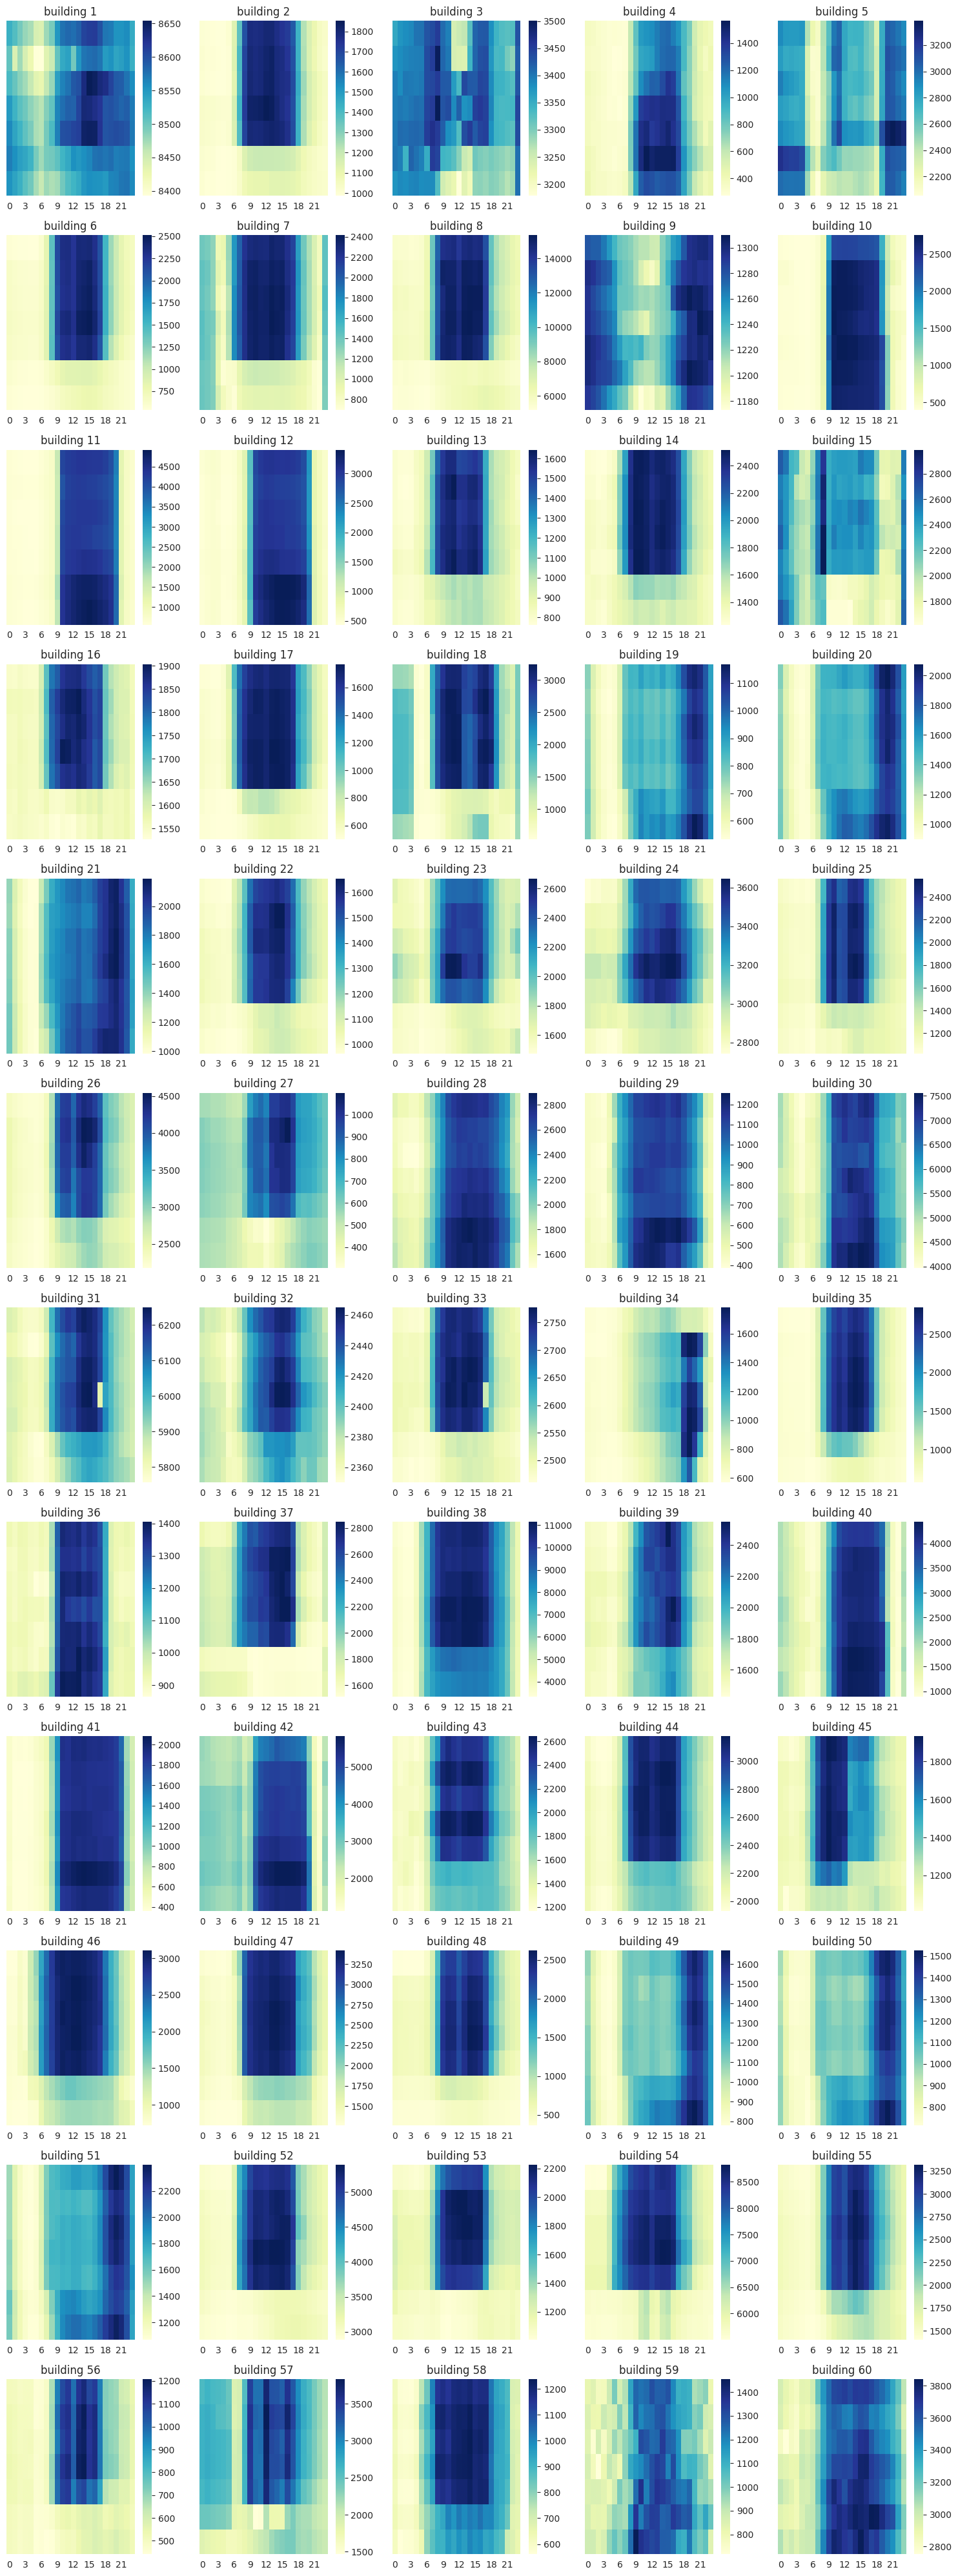

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 40))
for i, num in enumerate(eda_df['num'].unique(), 1):
    df = eda_df[eda_df.num == num]
    df = df.groupby(['weekday', 'hour'])['전력사용량(kWh)'].mean().reset_index()
    df_pivot = df.pivot_table(index='weekday', columns='hour', values='전력사용량(kWh)')
    plt.subplot(12, 5, i)
    sns.heatmap(df_pivot, cmap="YlGnBu")
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

plt.tight_layout()
plt.show()


## 평일 낮에만 전력사용량이 높은건물
## 평일 주말 상관없이 전력량 사용 높은 건물이 있다는 걸 알 수 있다.

# 이점을 활용해 k-means하여 파생변수 만들고 싶지만 시간없어서 패스

# 31, 33에 경우 목요일 오후 5시에 이상치 확인

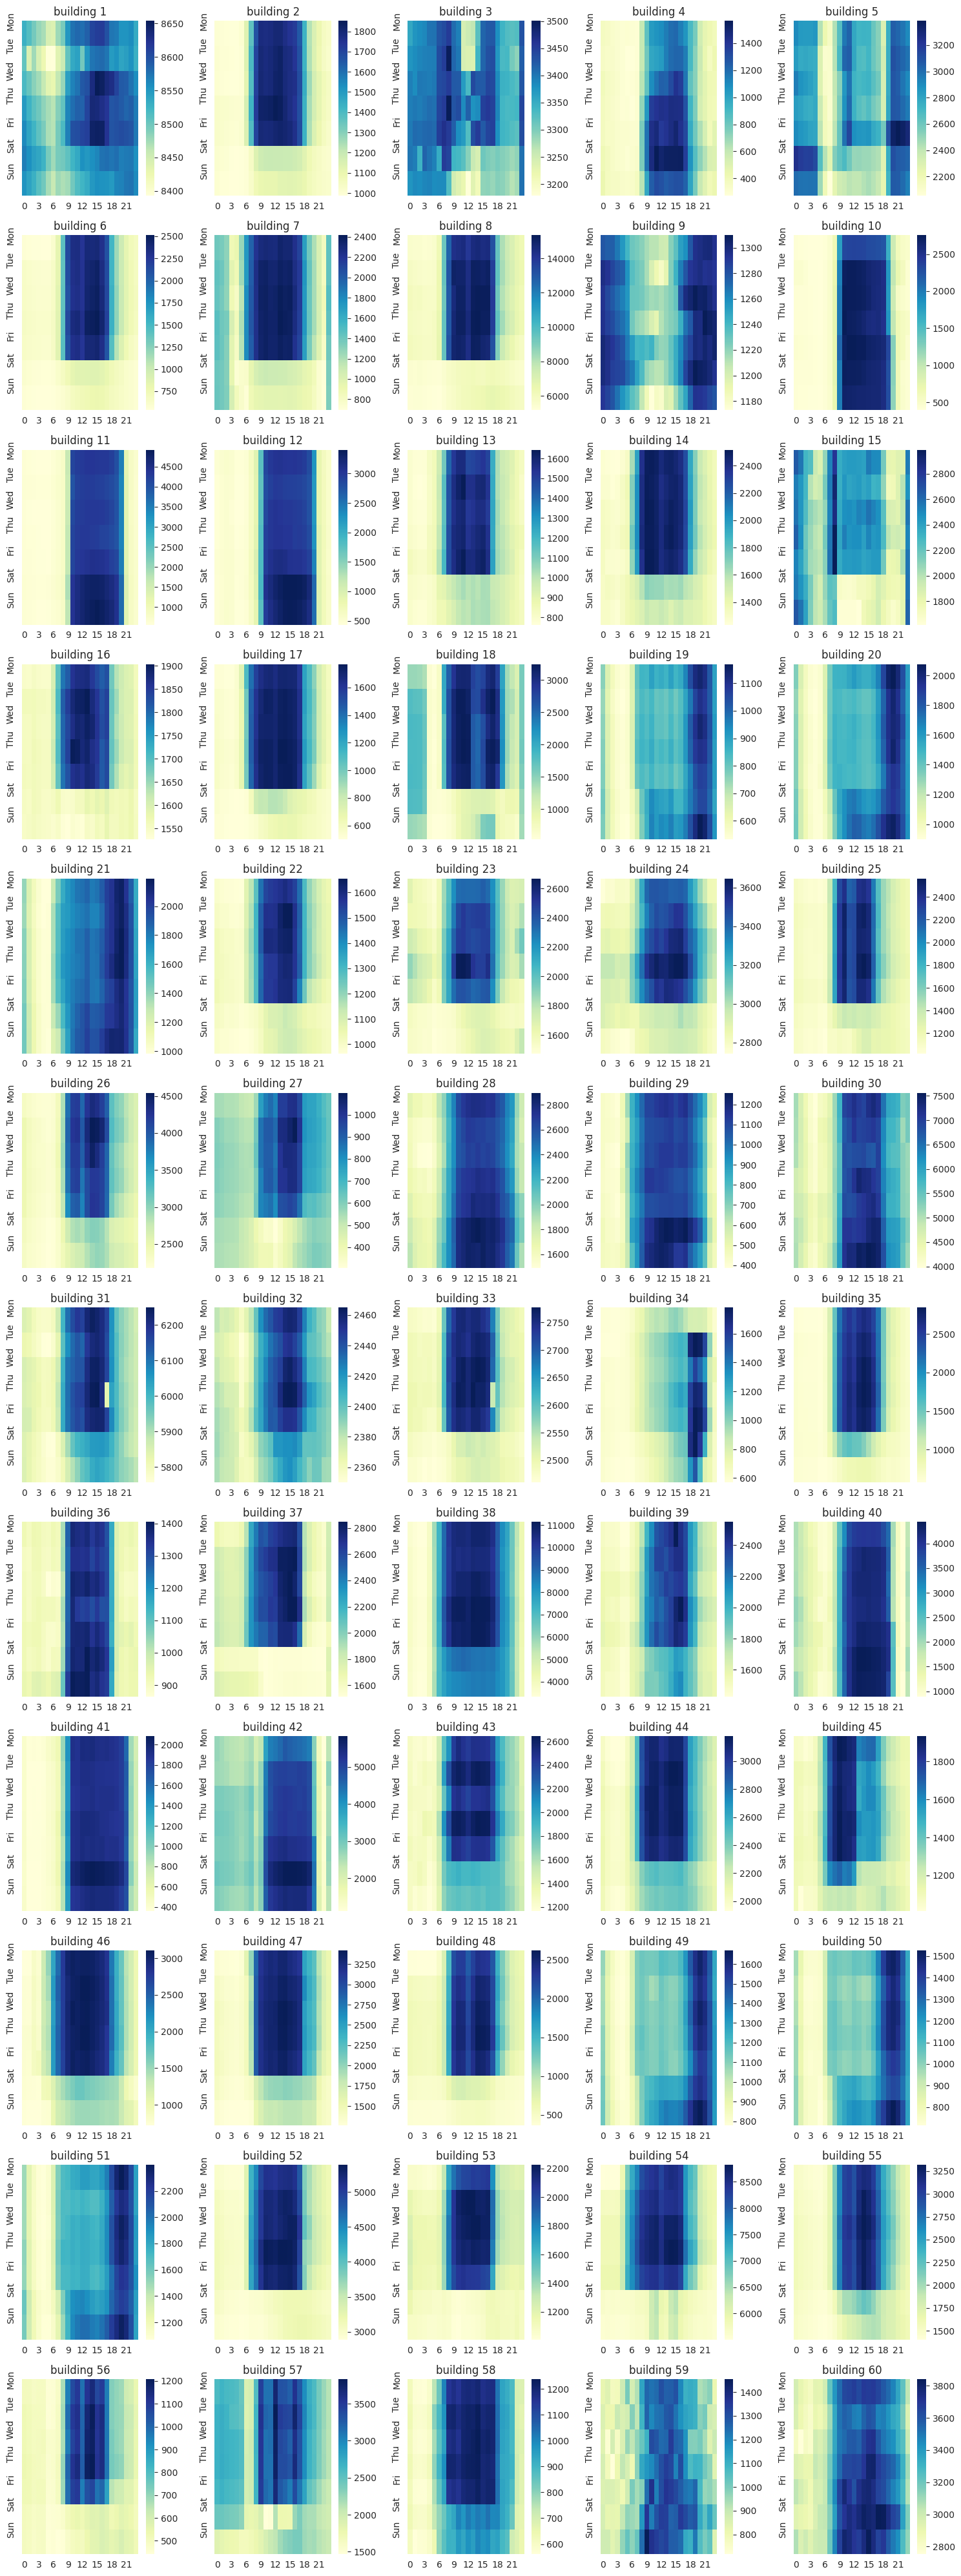

In [47]:
fig = plt.figure(figsize=(15, 40))
for i, num in enumerate(eda_df['num'].unique(), 1):
    df = eda_df[eda_df.num == num]
    df = df.groupby(['weekday', 'hour'])['전력사용량(kWh)'].mean().reset_index()
    df_pivot = df.pivot_table(index='weekday', columns='hour', values='전력사용량(kWh)')
    plt.subplot(12, 5, i)
    sns.heatmap(df_pivot, cmap="YlGnBu")
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


## 1.1 Target Distribution
Target에 해당하는 에너지 사용양의 분포 파악

평균,표준편차,왜도를 기준으로 파악

In [37]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


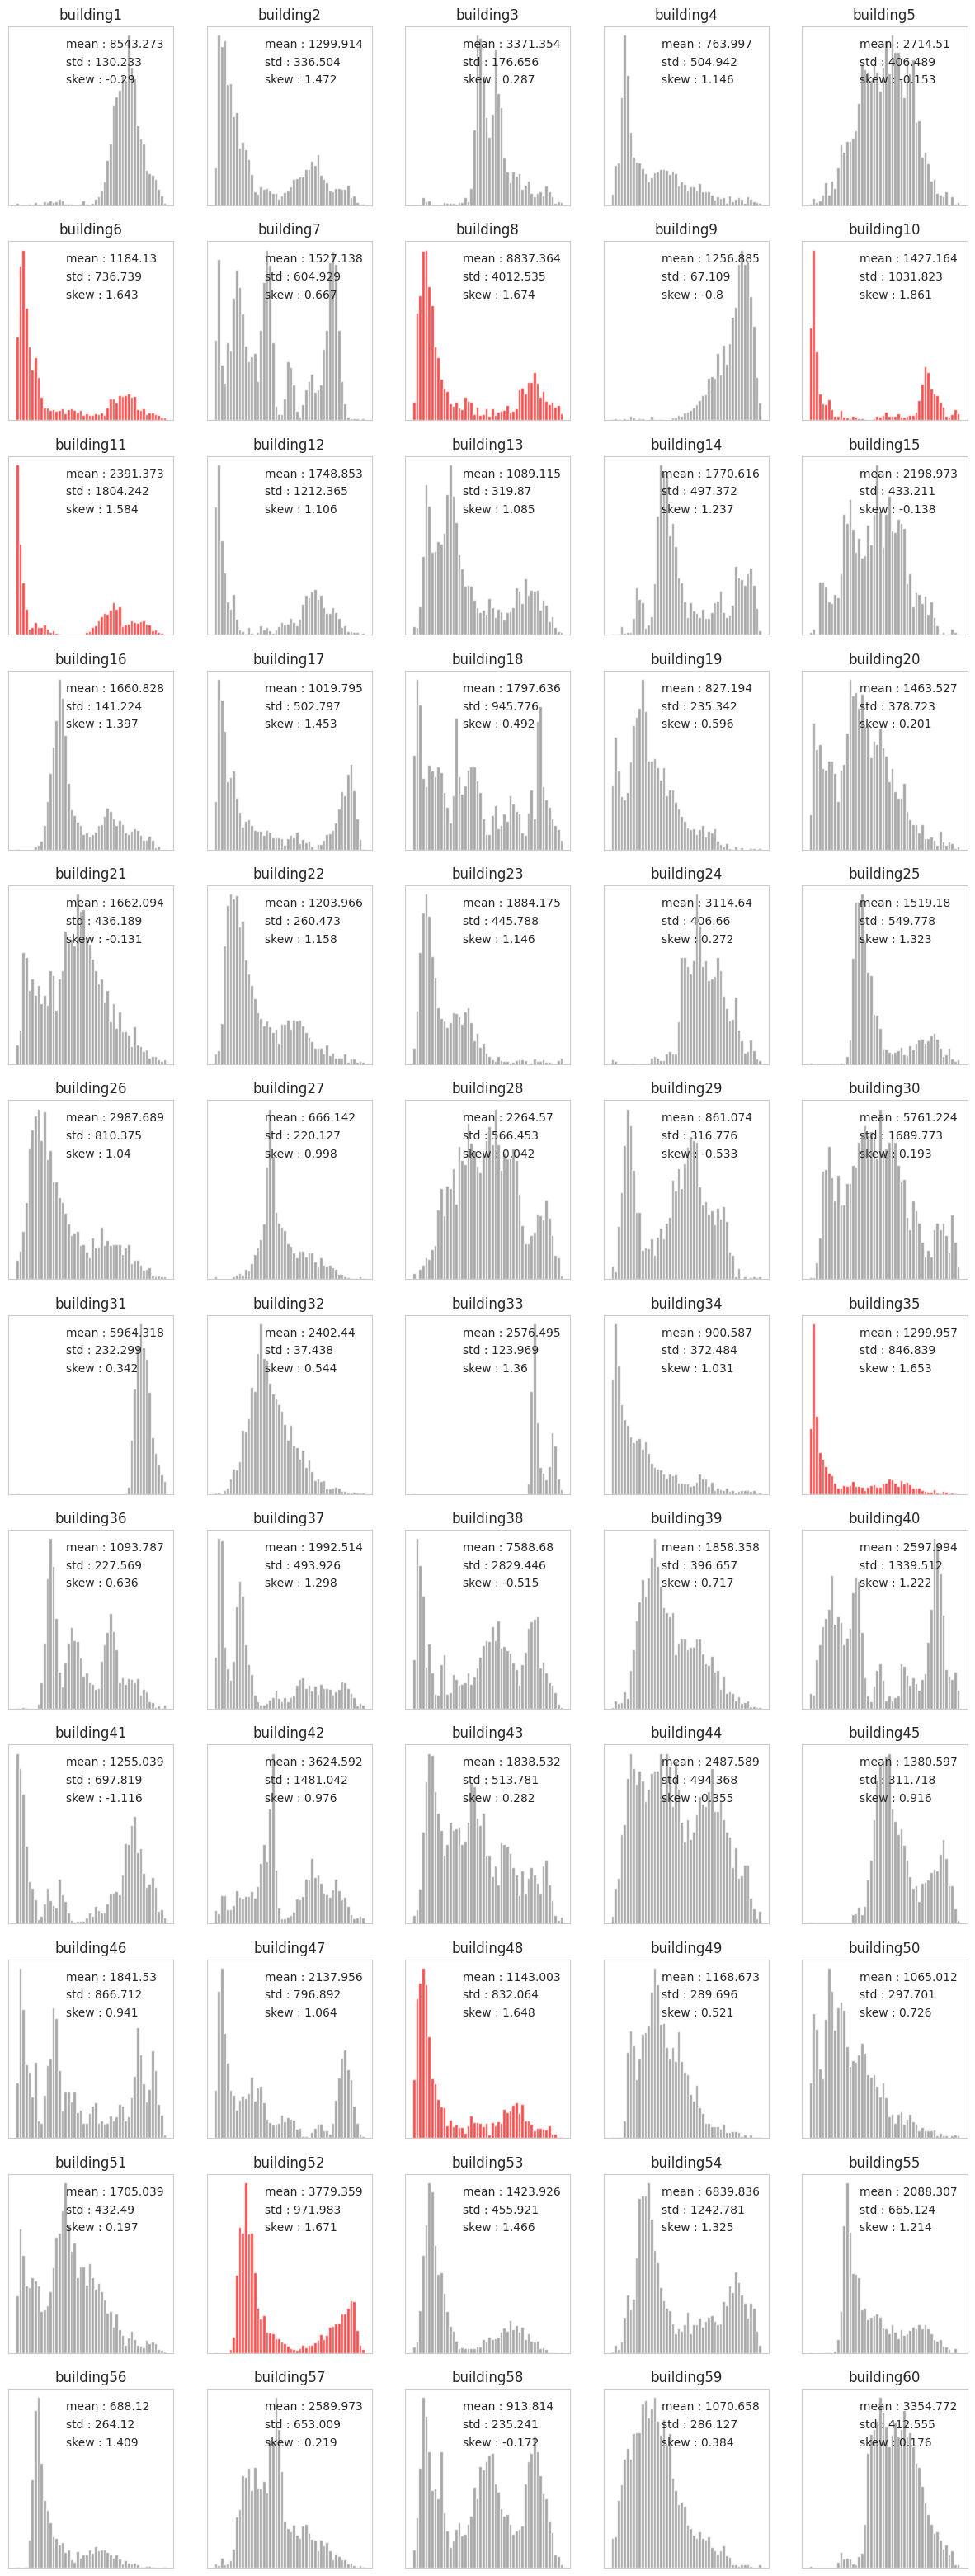

In [38]:
fig = plt.figure(figsize = (15, 40))
for num in range(1,61):
    ax = plt.subplot(12, 5, num)
    energy = eda_df.loc[eda_df.num == num, '전력사용량(kWh)'].values
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

# 모델링

test data는 데이터 전처리하였지만 전력사용량이 없어서
모델링은 train data로 사용하겠음
시간,온도,습도,건물 feature
전력사용량 target

In [50]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,1,6,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,1,6,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,1,6,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,2020-06-01,1,6,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,2020-06-01,1,6,0


In [49]:
# Adding features related to datetime
train_df['date_time'] = pd.to_datetime(train_df['date_time'])
train_df['hour'] = train_df['date_time'].dt.hour
train_df['weekday'] = train_df['date_time'].dt.weekday
train_df['date'] = train_df['date_time'].dt.date
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['weekend'] = train_df['weekday'].isin([5,6]).astype(int)


In [57]:
# 내가한거
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os



# `hour`, `weekday`, `day`, `month`, `weekend` 열이 수치형인지 확인 및 변환
train_df['hour'] = train_df['hour'].astype(np.float32)
train_df['weekday'] = train_df['weekday'].astype(np.float32)
train_df['day'] = train_df['day'].astype(np.float32)
train_df['month'] = train_df['month'].astype(np.float32)
train_df['weekend'] = train_df['weekend'].astype(np.float32)

X = train_df.drop(columns=['전력사용량(kWh)', 'date_time','풍속(m/s)','강수량(mm)'	,'일조(hr)'	,'비전기냉방설비운영'	,'태양광보유','date']).values # date_time , 기온 , 습도
y = train_df['전력사용량(kWh)'].values  # 전력사용량

# KMeans 클러스터링을 통해 파생변수 생성
# kmeans = KMeans( n_clusters=3,random_state=42)
# cluster_labels = kmeans.fit_predict(X)

# # 원래 데이터에 클러스터 라벨 추가
# X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler =  RobustScaler()

# X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터 타입을 float으로 변환 (만약 X나 y에 비숫자 데이터가 포함된 경우)
X = X.astype(np.float32)
y = y.astype(np.float32)

# 데이터를 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear( X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(256, 128)
        self.bn4 =nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(64, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)



        # 채우시오




        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64

# K-Fold Cross Validation
kf = KFold(n_splits= 5     ,  shuffle=True, random_state=42)
fold = 1

# Early Stopping 설정
early_stopping_patience =5
early_stopping_counter =0
best_loss = float('inf')

# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

valid_losses = []

for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[  train_index   ], X_tensor[val_index        ]
    y_train_fold, y_valid_fold = y_tensor[   train_index  ], y_tensor[  val_index      ]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = DNNRegression().to(    device    )
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001           , weight_decay=0.1         )
    scheduler = optim.lr_scheduler.StepLR(   optimizer,step_size=2,gamma=0.1           )

    # 학습 시간 측정 시작
    start_time = time.time()

    # 모델 epoch 다 돌고 조기종료 0 으로 초기화
    early_stopping_counter = 0
    best_loss = float('inf')


    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(   device    ), batch_y.to( device       )  # 데이터를 GPU로 이동

            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()



            epoch_loss += loss.item()

        # 학습률 업데이트
        scheduler.step()

        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(   device  ), y_valid_fold.to( device      )
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)




        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")

        # Early Stopping
        # validation loss가 현재까지 갱신된 최저 loss보다 적다면 best loss를 갱신 , # Early stop을 하기 위한 코드
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0

            # 성능이 뛰어날때 마다 모델을 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch: {epoch+1}")
                break





    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        val_predictions = model(X_valid_fold)
        valid_losses.append(criterion(val_predictions, y_valid_fold))
        print(f"Fold {fold} 평가손실 Loss: {valid_losses[-1].item():.4f}")
        print(f"Fold {fold} 예측 값: {val_predictions[:5].view(-1).tolist()}")
        print(f"Fold {fold} 실제 값: {y_valid_fold[:5].view(-1).tolist()}")
    fold +=1







# Kfold의 loss 모음 리스트
print(valid_losses)


Fold 1, Epoch 1/10, Loss: 9026917.1301, Valid Loss: 7771193.0000
Fold 1, Epoch 2/10, Loss: 6552678.3535, Valid Loss: 5348458.0000
Fold 1, Epoch 3/10, Loss: 5292947.3739, Valid Loss: 5056964.0000
Fold 1, Epoch 4/10, Loss: 5113729.9916, Valid Loss: 4866583.5000
Fold 1, Epoch 5/10, Loss: 5027978.5344, Valid Loss: 4852959.0000
Fold 1, Epoch 6/10, Loss: 5012294.7978, Valid Loss: 4793765.5000
Fold 1, Epoch 7/10, Loss: 4993458.3137, Valid Loss: 4810086.0000
Fold 1, Epoch 8/10, Loss: 4993413.1011, Valid Loss: 4852228.5000
Fold 1, Epoch 9/10, Loss: 4997820.7698, Valid Loss: 4870948.0000
Fold 1, Epoch 10/10, Loss: 4994471.4326, Valid Loss: 4741274.5000
Fold 1 평가손실 Loss: 4741274.5000
Fold 1 예측 값: [2004.8914794921875, 2090.1259765625, 1974.56103515625, 2190.647216796875, 2447.9296875]
Fold 1 실제 값: [8179.05615234375, 8048.80810546875, 7945.1279296875, 7836.912109375, 7989.83984375]
Fold 2, Epoch 1/10, Loss: 9046156.6562, Valid Loss: 7896127.5000
Fold 2, Epoch 2/10, Loss: 6587623.4903, Valid Loss: 5

###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.

건물별 평일,주말의 따른 시간별 전력사용량 시각화 -> 히트맵
건물별 전력사용량 분포 시각화

시각화와 파생변수 처리는 데이콘에서 참고함

시간, 온도 , 습도 ,시간 , 등을 중요 피처로 생각

이 파생변수로 모델링

Robustscale로 정규화
은닉층 5개 생성 각 배치노말,드롭아웃 기법 사용
forwar에서도 드롭아웃 사용 forward는 어떤 기법인지는 잘 모르겠음

Cpu로 학습 kfold 사용, Early stop 사용